In [1]:
library(tidyverse)
library(targets)
library(Seurat)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching SeuratObject

Attaching sp



In [2]:
obj = qs::qread('_targets/objects/exp_other_obob')
obj

An object of class Seurat 
56583 features across 28456 samples within 3 assays 
Active assay: SCT (24262 features, 3000 variable features)
 2 other assays present: RNA, integrated
 2 dimensional reductions calculated: pca, umap

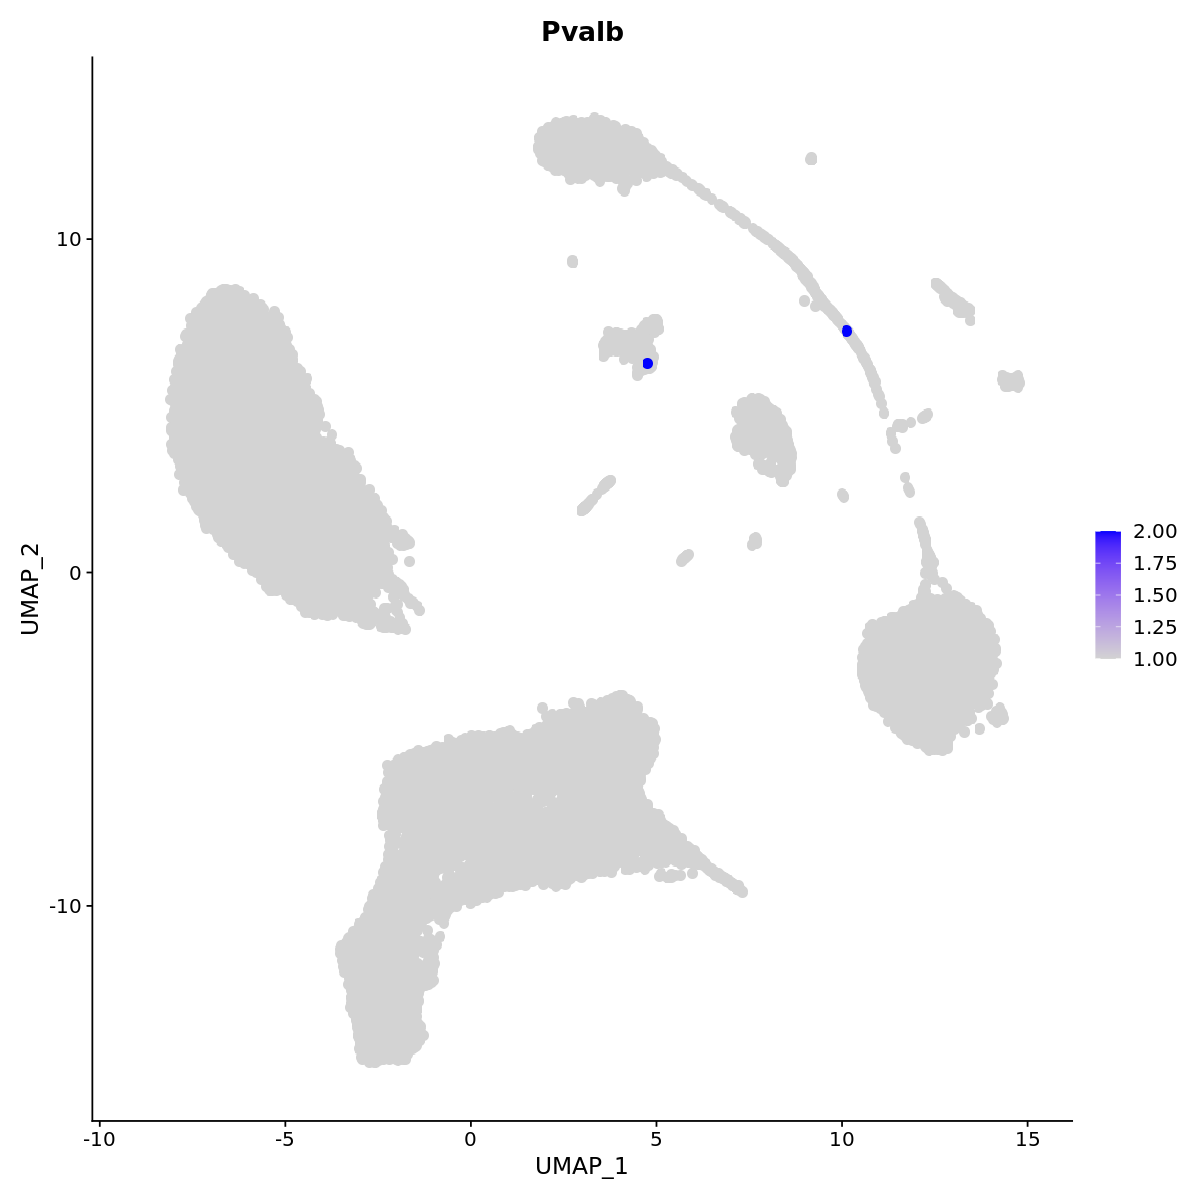

In [5]:
DefaultAssay(obj) = "RNA"
options(repr.plot.width=10, repr.plot.height=10)
fp = FeaturePlot(obj,
            features = c("Pvalb"),
           pt.size=5,
           order=TRUE,
           min.cutoff="q01",
           max.cutoff="q99",
           raster=TRUE,
           raster.dpi=c(1024, 1024)
           )
fp

In [3]:
head(obj@meta.data)

orig.ident nCount_RNA nFeature_RNA Index.10x nCount_HTO
CCTATCGAGCCATTCA_1_1 SI-TT-A11  49695      7017         SI-TT-A11 1473      
GTCCTCAAGCGAGGAG_1_1 SI-TT-A11  41375      6414         SI-TT-A11 2757      
AAGGTAATCTGAGGCC_1_1 SI-TT-A11  40000      6407         SI-TT-A11 1678      
TCCGTGTCACCTGTCT_1_1 SI-TT-A11  39270      6913         SI-TT-A11 1516      
CTTCGGTTCAGCTGAT_1_1 SI-TT-A11  40118      5968         SI-TT-A11 2558      
TCTAACTCAATCTCGA_1_1 SI-TT-A11  35178      6131         SI-TT-A11 1966      
                     nFeature_HTO Index.HTO nCount_spliced nFeature_spliced
CCTATCGAGCCATTCA_1_1 12           D706      7105           3206            
GTCCTCAAGCGAGGAG_1_1 12           D706      6392           2838            
AAGGTAATCTGAGGCC_1_1 12           D706      5088           2532            
TCCGTGTCACCTGTCT_1_1 12           D706      6058           2883            
CTTCGGTTCAGCTGAT_1_1 12           D706      7081           2634            
TCTAACTCAATCTCGA_1_1 12           D706      4758           2406            
                     nCount_unspliced ⋯ seurat_clusters strain treatment time 
CCTATCGAGCCATTCA_1_1 42590            ⋯ 12              obob   FGF1      Day14
GTCCTCAAGCGAGGAG_1_1 34983            ⋯ 13              obob   FGF1      Day5 
AAGGTAATCTGAGGCC_1_1 34912            ⋯ 12              obob   FGF1      Day14
TCCGTGTCACCTGTCT_1_1 33212            ⋯ 12              obob   FGF1      Day14
CTTCGGTTCAGCTGAT_1_1 33037            ⋯ 13              obob   FGF1      Day5 
TCTAACTCAATCTCGA_1_1 30420            ⋯ 12              obob   FGF1      Day14
                     collection_date isolation_date batch   predicted.id
CCTATCGAGCCATTCA_1_1 220407          22/6/2022      Batch 1 NG2_OPC2    
GTCCTCAAGCGAGGAG_1_1 211213          22/6/2022      Batch 1 NFOL        
AAGGTAATCTGAGGCC_1_1 220131          22/6/2022      Batch 1 NG2_OPC2    
TCCGTGTCACCTGTCT_1_1 220407          22/6/2022      Batch 1 Parstuber2A 
CTTCGGTTCAGCTGAT_1_1 211213          22/6/2022      Batch 1 NFOL        
TCTAACTCAATCTCGA_1_1 220131          22/6/2022      Batch 1 NG2_OPC2    
                     prediction.score.max labels            
CCTATCGAGCCATTCA_1_1 0.3917772            NG2_OPC2-Microglia
GTCCTCAAGCGAGGAG_1_1 1.0000000            NFOL              
AAGGTAATCTGAGGCC_1_1 0.9625983            NG2_OPC2-Microglia
TCCGTGTCACCTGTCT_1_1 0.2406799            NG2_OPC2-Microglia
CTTCGGTTCAGCTGAT_1_1 0.9833581            NFOL              
TCTAACTCAATCTCGA_1_1 0.4448438            NG2_OPC2-Microglia

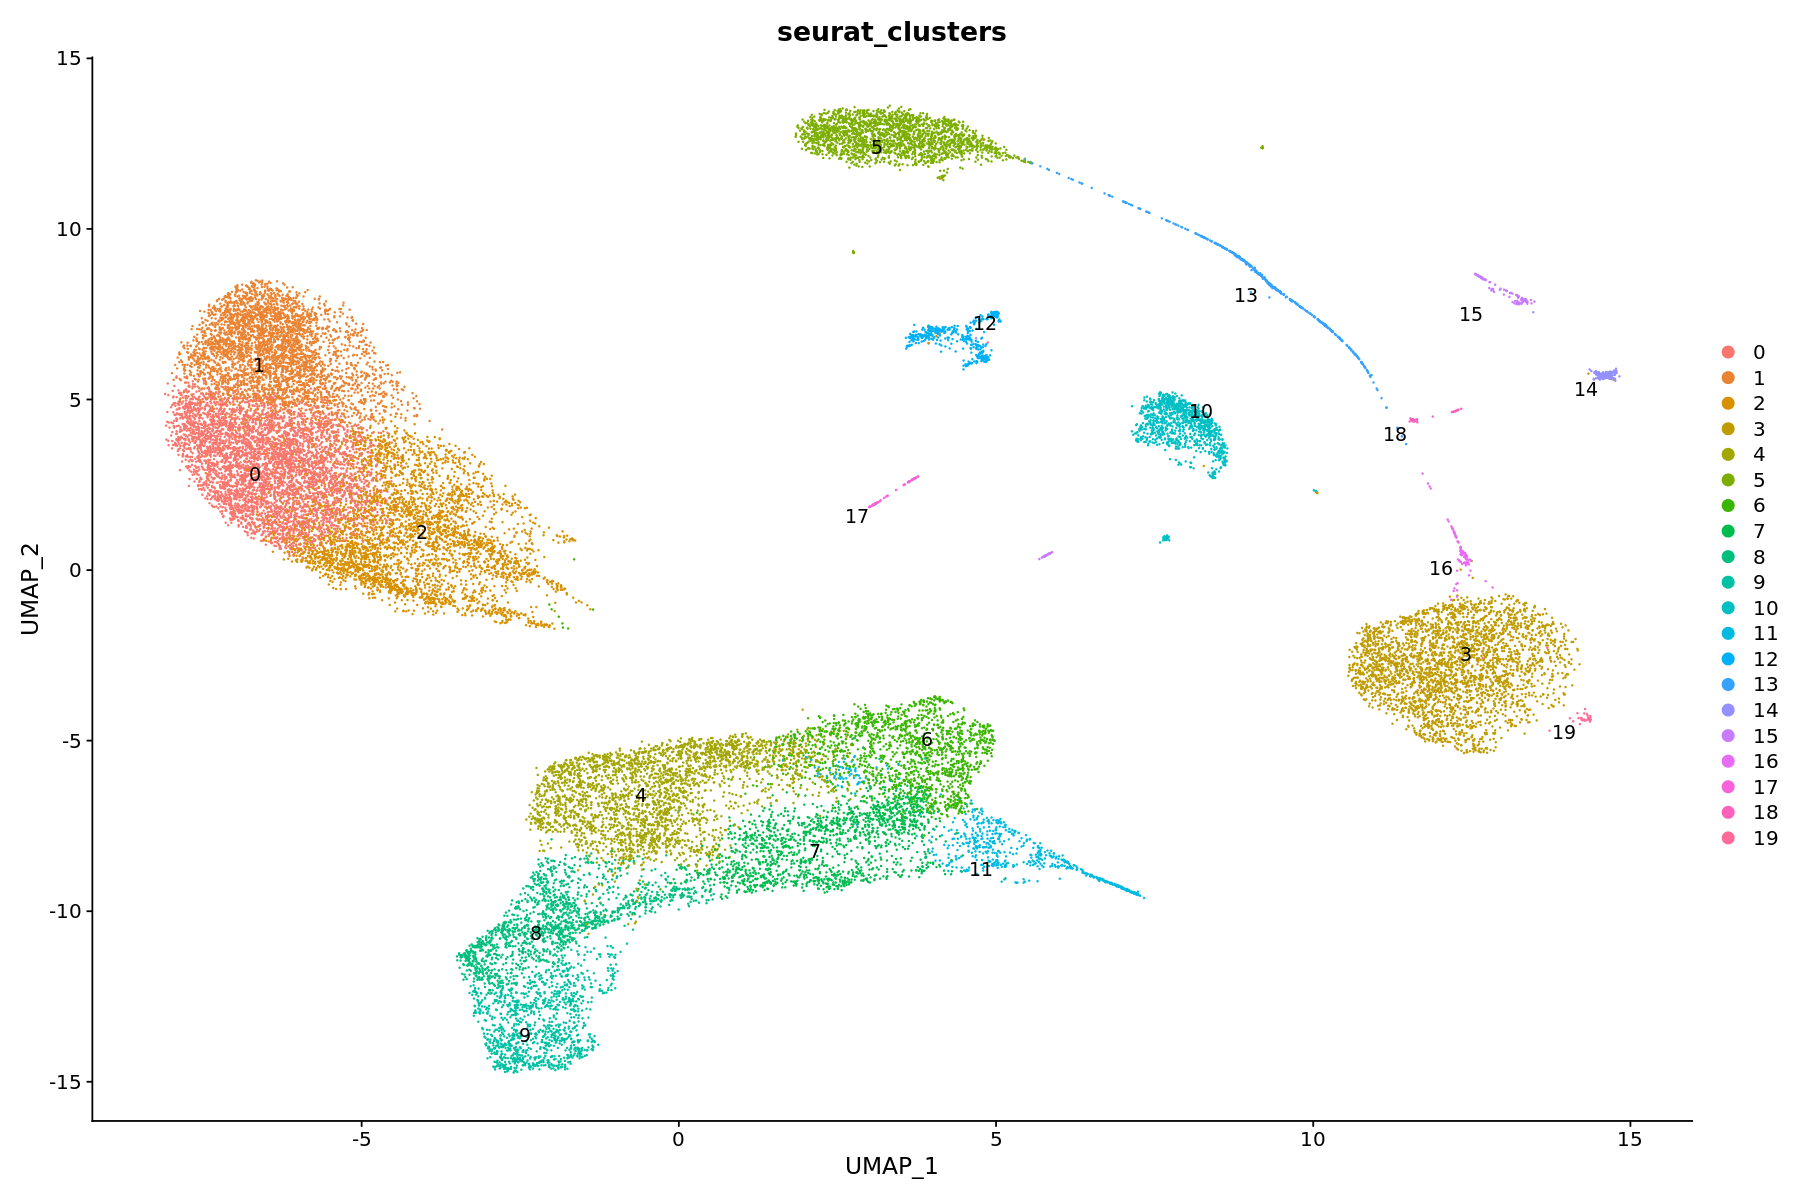

In [4]:
options(repr.plot.width=15, repr.plot.height=10)
DimPlot(obj, reduction = "umap", group.by = "seurat_clusters", label = TRUE,  repel = TRUE)

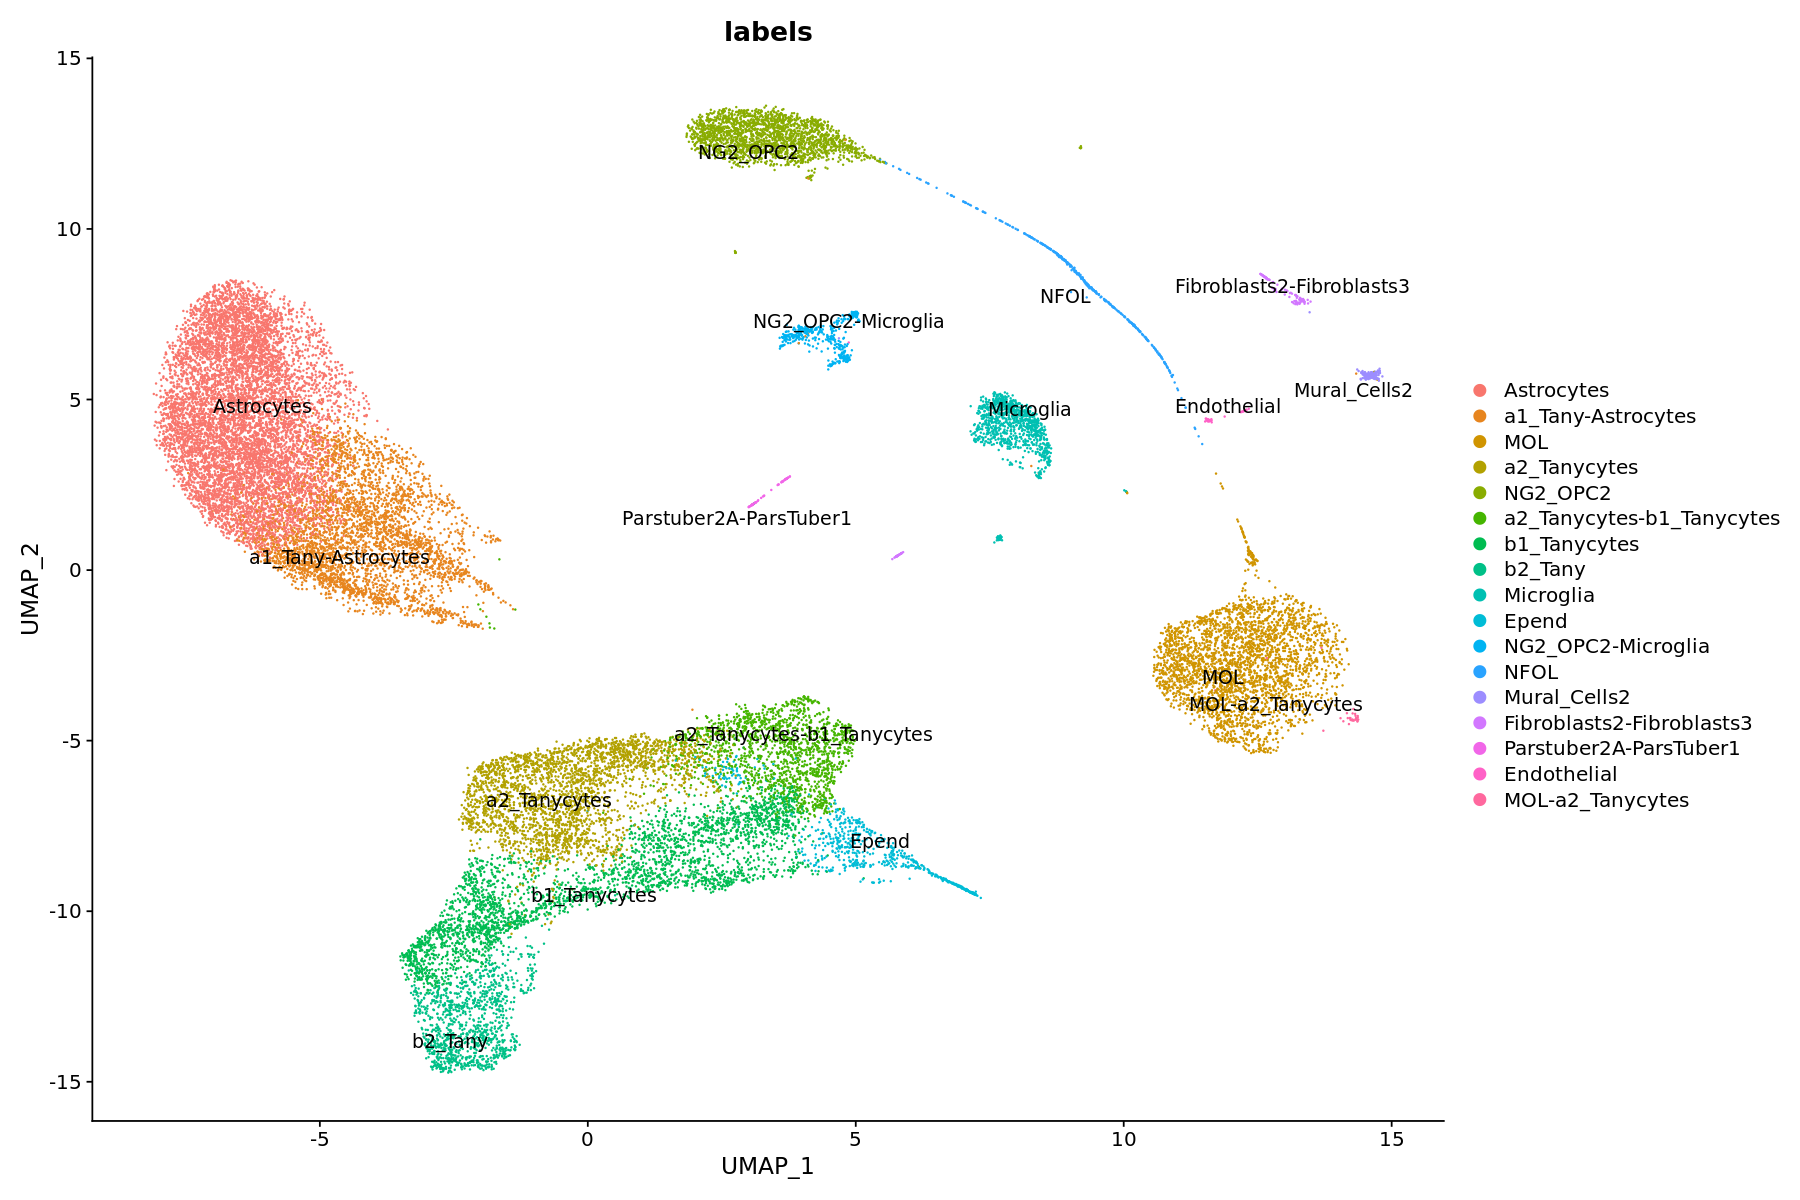

In [12]:
options(repr.plot.width=15, repr.plot.height=10)
DimPlot(obj, reduction = "umap", group.by = "labels", label = TRUE,  repel = TRUE)

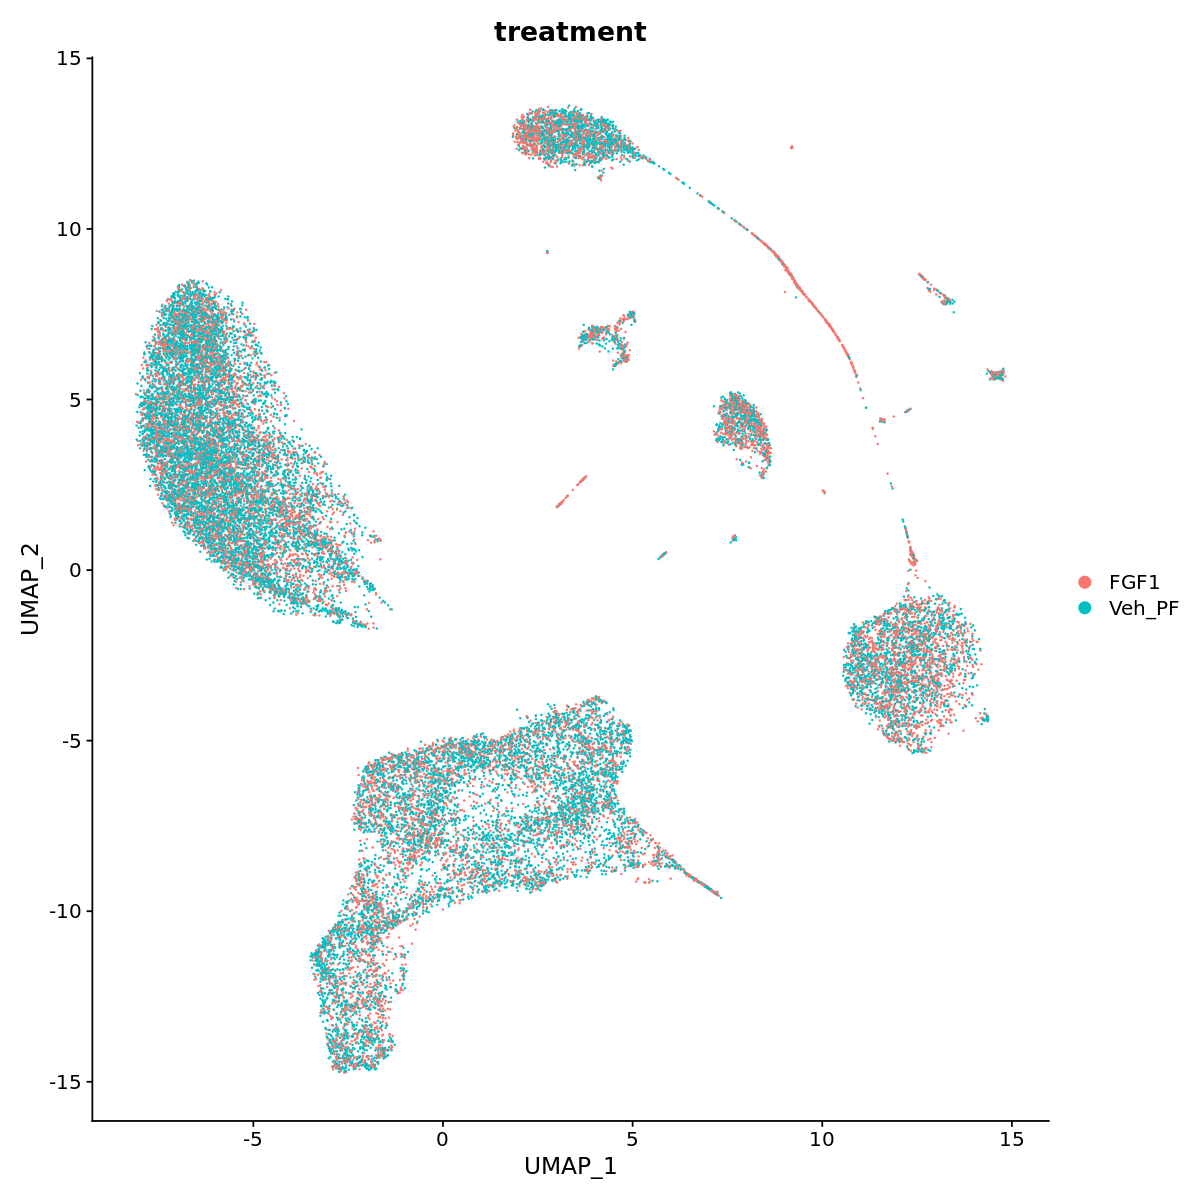

In [13]:
# obj@meta.data$GqPlus = obj@meta.data$Group == 'GqPlus'
options(repr.plot.width=10, repr.plot.height=10)
DimPlot(obj, reduction = "umap", group.by = "treatment", label = FALSE)

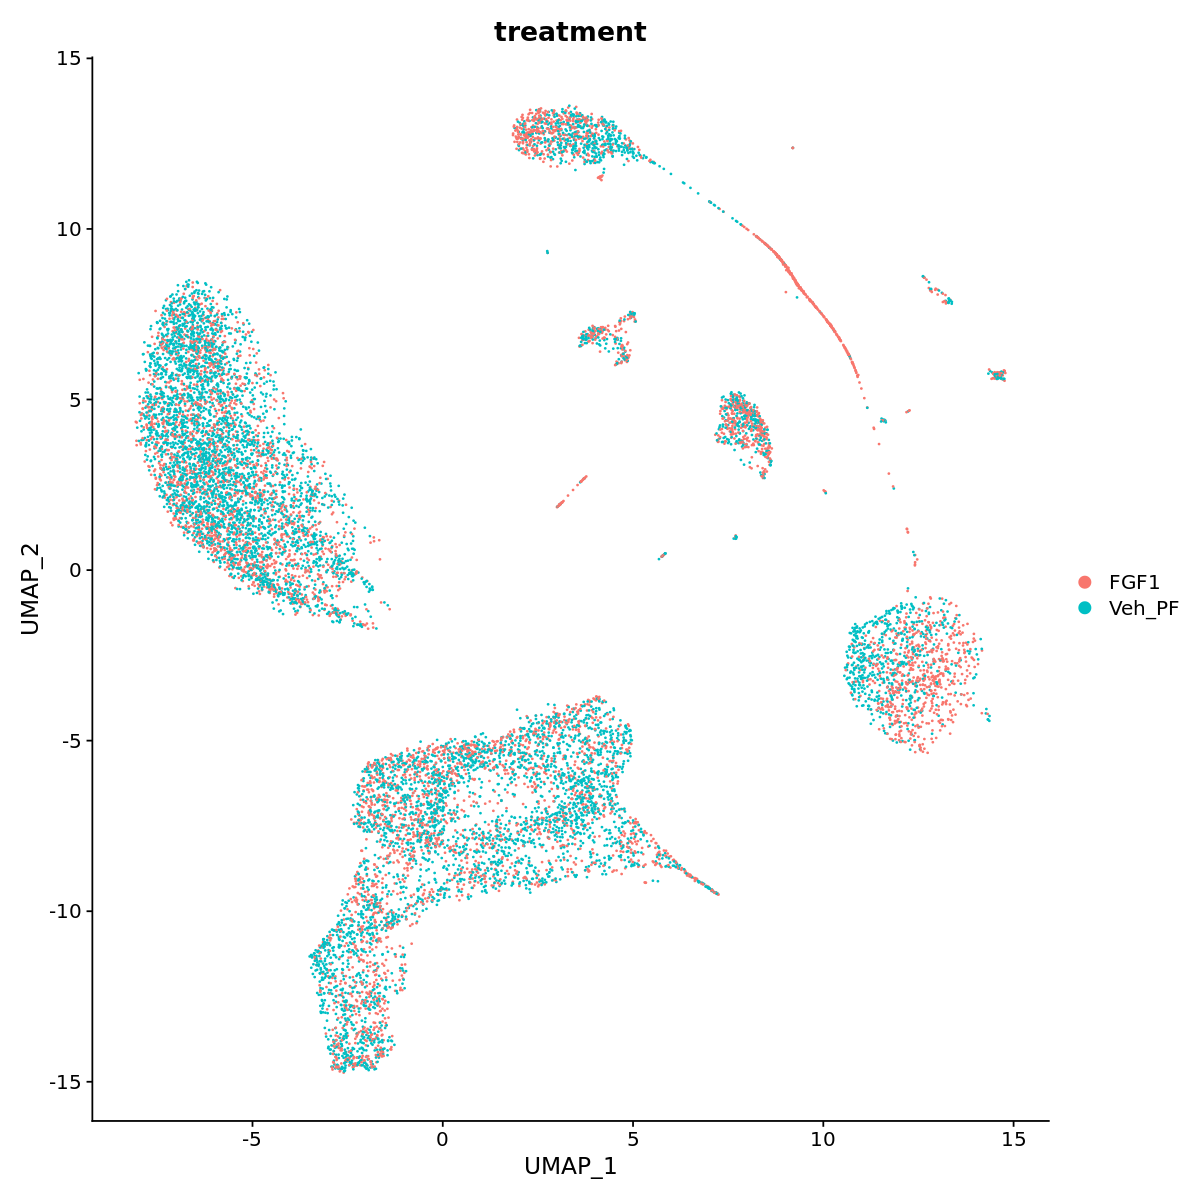

In [15]:
# obj@meta.data$GqPlus = obj@meta.data$Group == 'GqPlus'
obj_d5 = subset(obj, subset = time == "Day5")
options(repr.plot.width=10, repr.plot.height=10)
DimPlot(obj_d5, reduction = "umap", group.by = "treatment", label = FALSE)

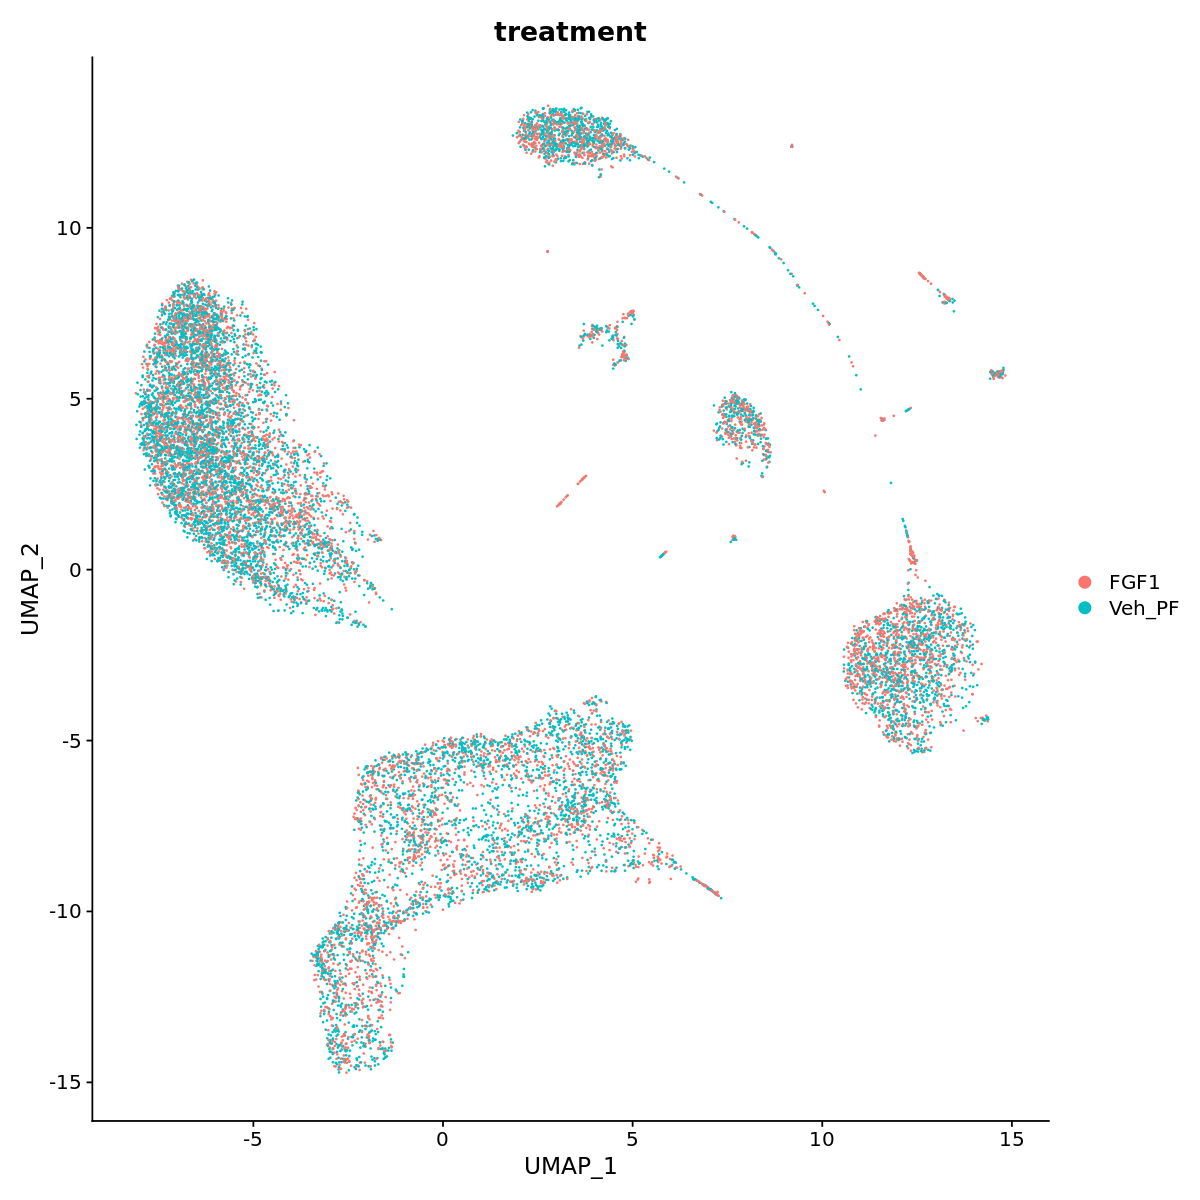

In [16]:
# obj@meta.data$GqPlus = obj@meta.data$Group == 'GqPlus'
obj_d14 = subset(obj, subset = time == "Day14")
options(repr.plot.width=10, repr.plot.height=10)
DimPlot(obj_d14, reduction = "umap", group.by = "treatment", label = FALSE)

In [8]:
colnames(head(obj@meta.data))

[1] "orig.ident"                    "nCount_RNA"                   
 [3] "nFeature_RNA"                  "Index.10x"                    
 [5] "nCount_HTO"                    "nFeature_HTO"                 
 [7] "Index.HTO"                     "nCount_spliced"               
 [9] "nFeature_spliced"              "nCount_unspliced"             
[11] "nFeature_unspliced"            "HTO_mcl_maxID"                
[13] "HTO_mcl_secondID"              "HTO_mcl_margin"               
[15] "HTO_mcl_classification"        "HTO_mcl_classification.global"
[17] "hash.mcl.ID"                   "doublet"                      
[19] "predicted_dub_std"             "predicted_dub_cut"            
[21] "predicted_dub_all"             "nCount_SCT"                   
[23] "nFeature_SCT"                  "SCT_snn_res.0.8"              
[25] "seurat_clusters"               "strain"                       
[27] "treatment"                     "time"                         
[29] "collection_date"               "isolation_date"               
[31] "batch"                         "predicted.id"                 
[33] "prediction.score.max"          "labels"

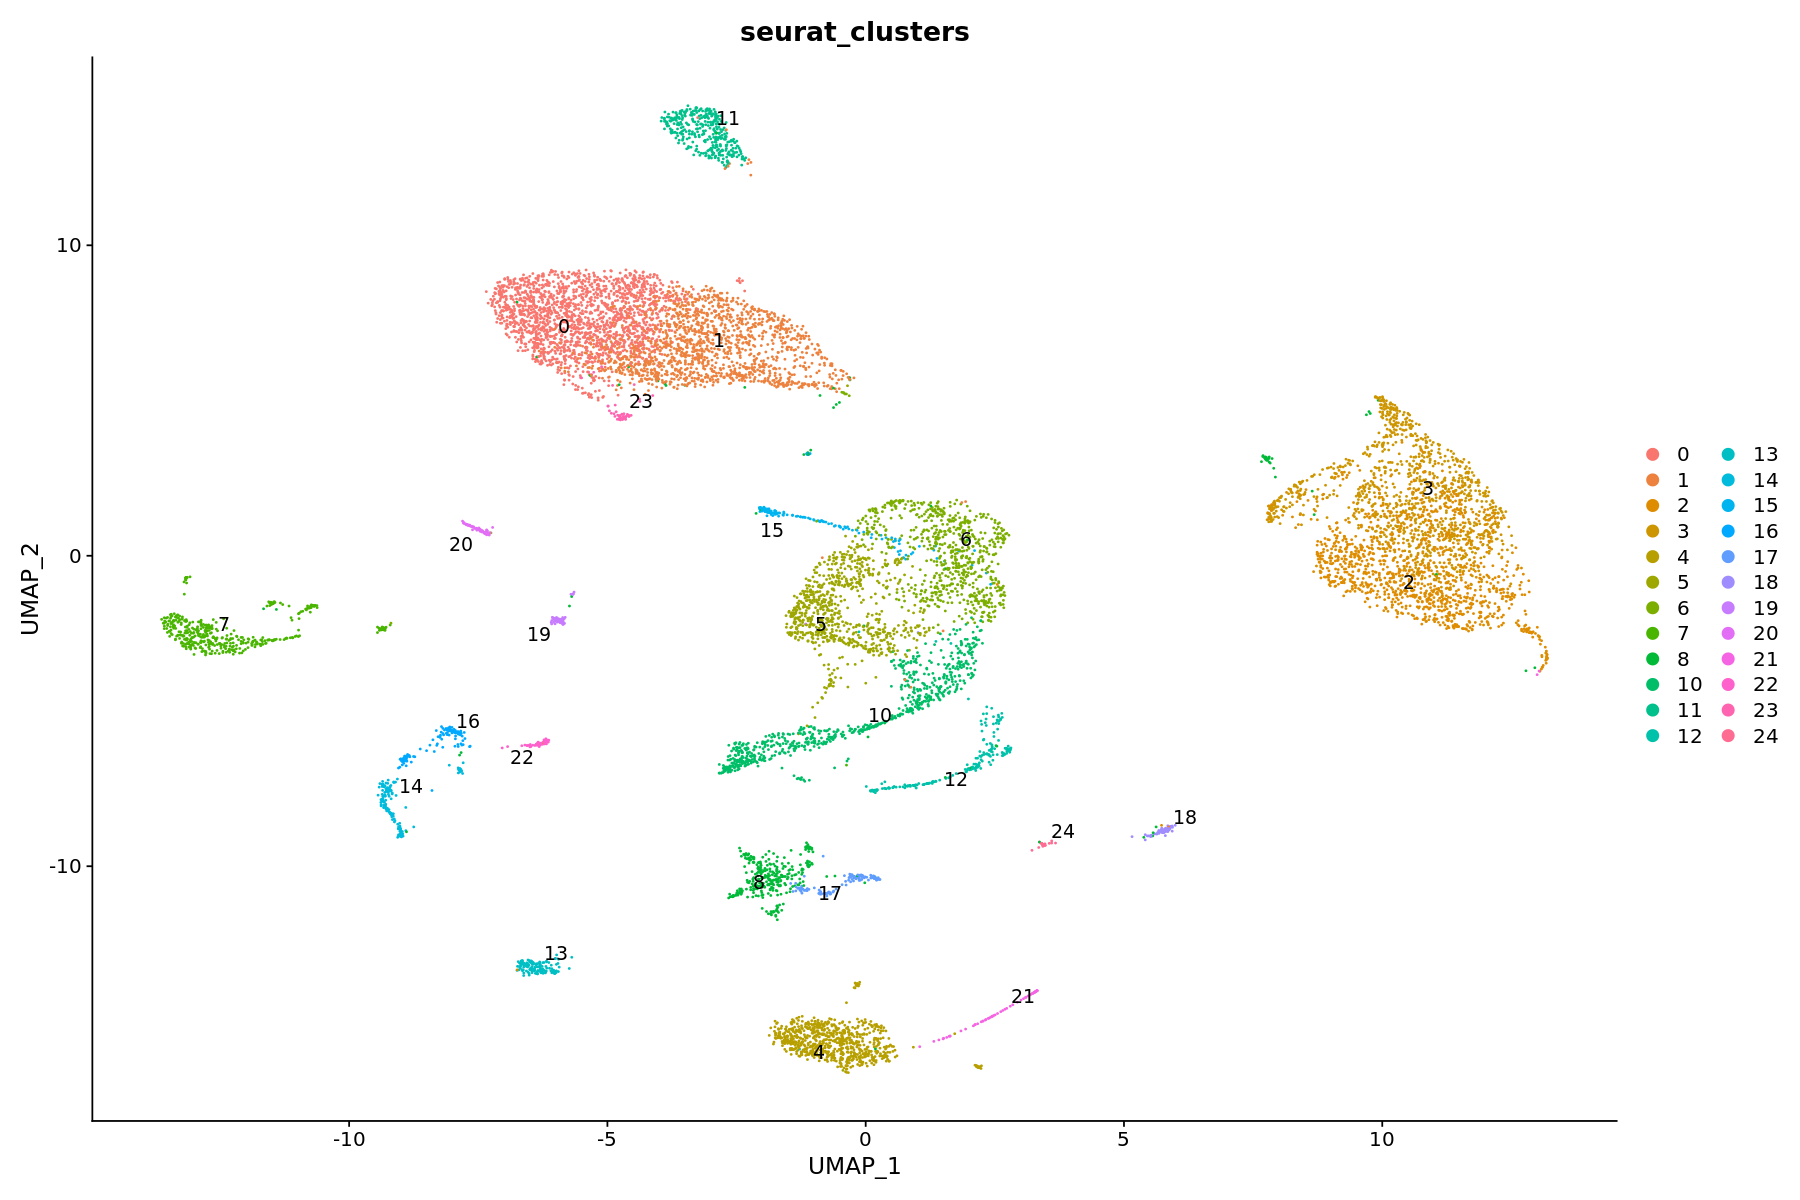

In [140]:
options(repr.plot.width=15, repr.plot.height=10)
DimPlot(obj, reduction = "umap", group.by = "seurat_clusters", label = TRUE,  repel = TRUE)

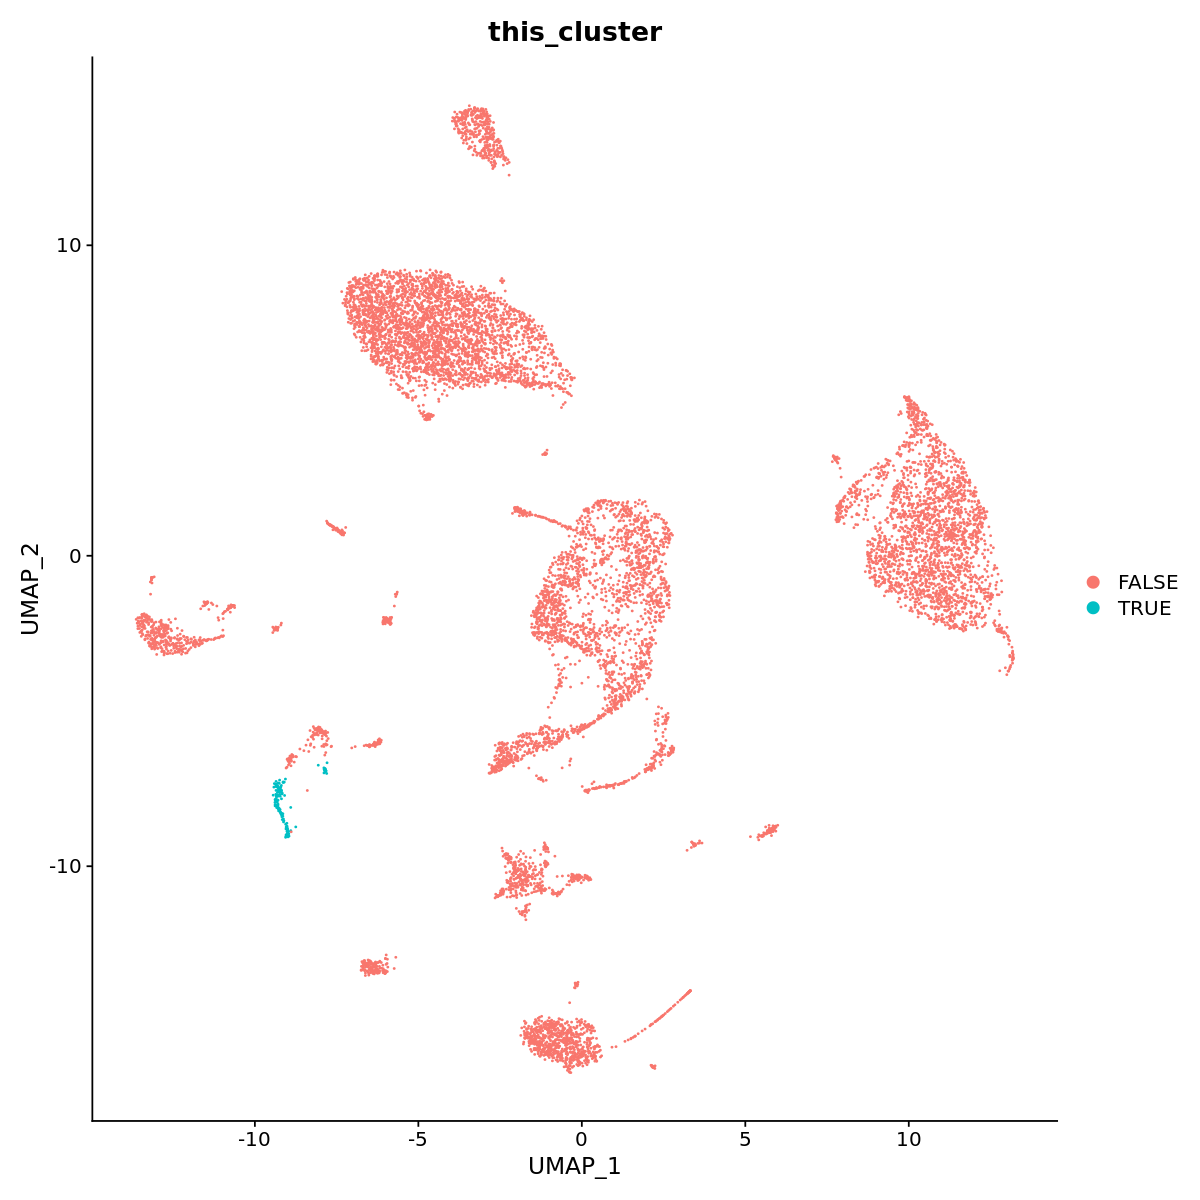

In [141]:
obj@meta.data$this_cluster = obj@meta.data$seurat_clusters == 14
options(repr.plot.width=10, repr.plot.height=10)
DimPlot(obj, reduction = "umap", group.by = "this_cluster", label = FALSE)



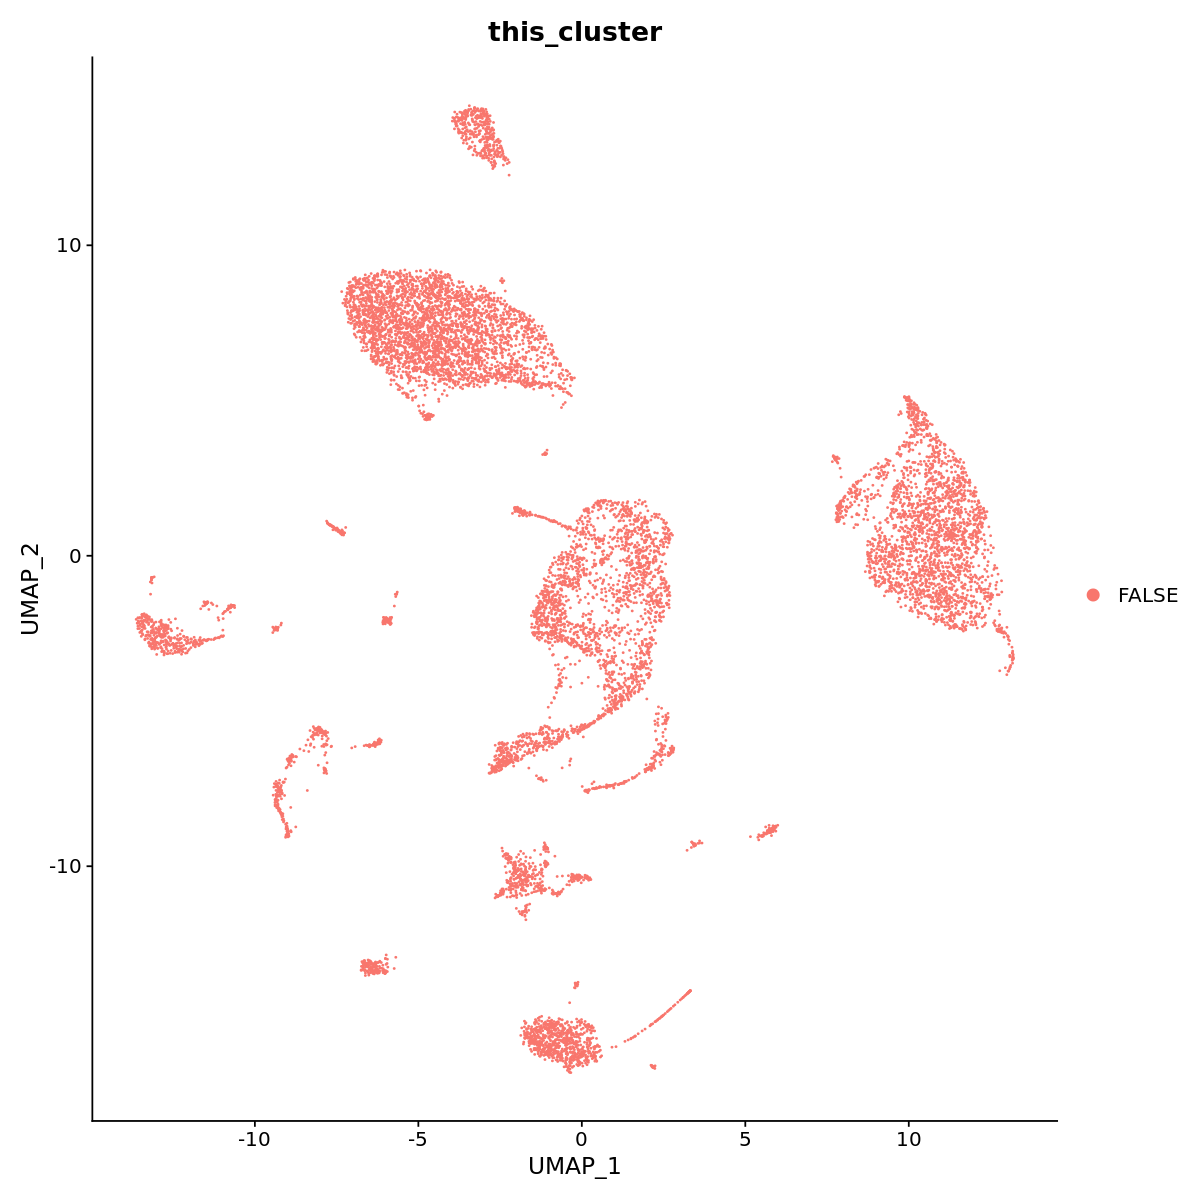

In [142]:
obj@meta.data$this_cluster = obj@meta.data$labels == "b2_tany"
options(repr.plot.width=10, repr.plot.height=10)
DimPlot(obj, reduction = "umap", group.by = "this_cluster", label = FALSE)



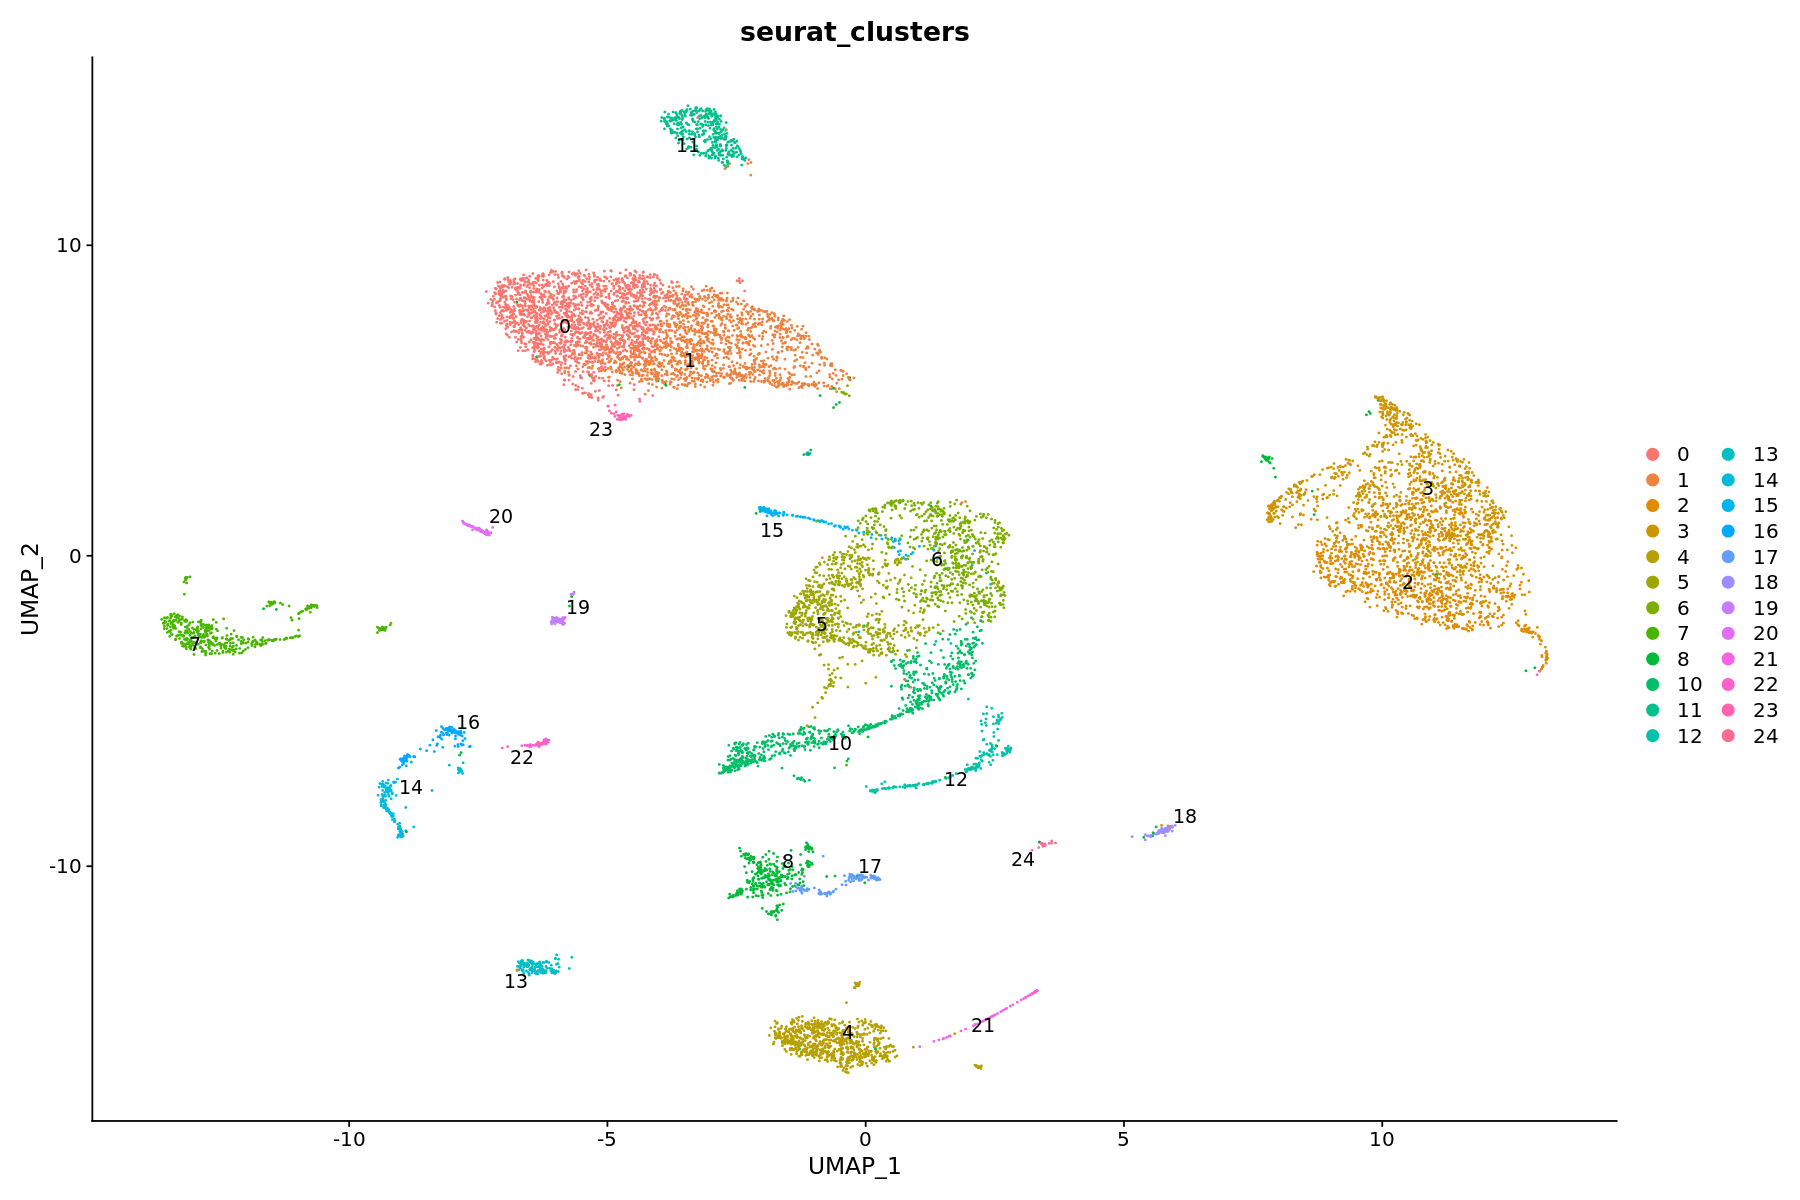

In [143]:
options(repr.plot.width=15, repr.plot.height=10)
DimPlot(obj, reduction = "umap", group.by = "seurat_clusters", label = TRUE,  repel = TRUE)

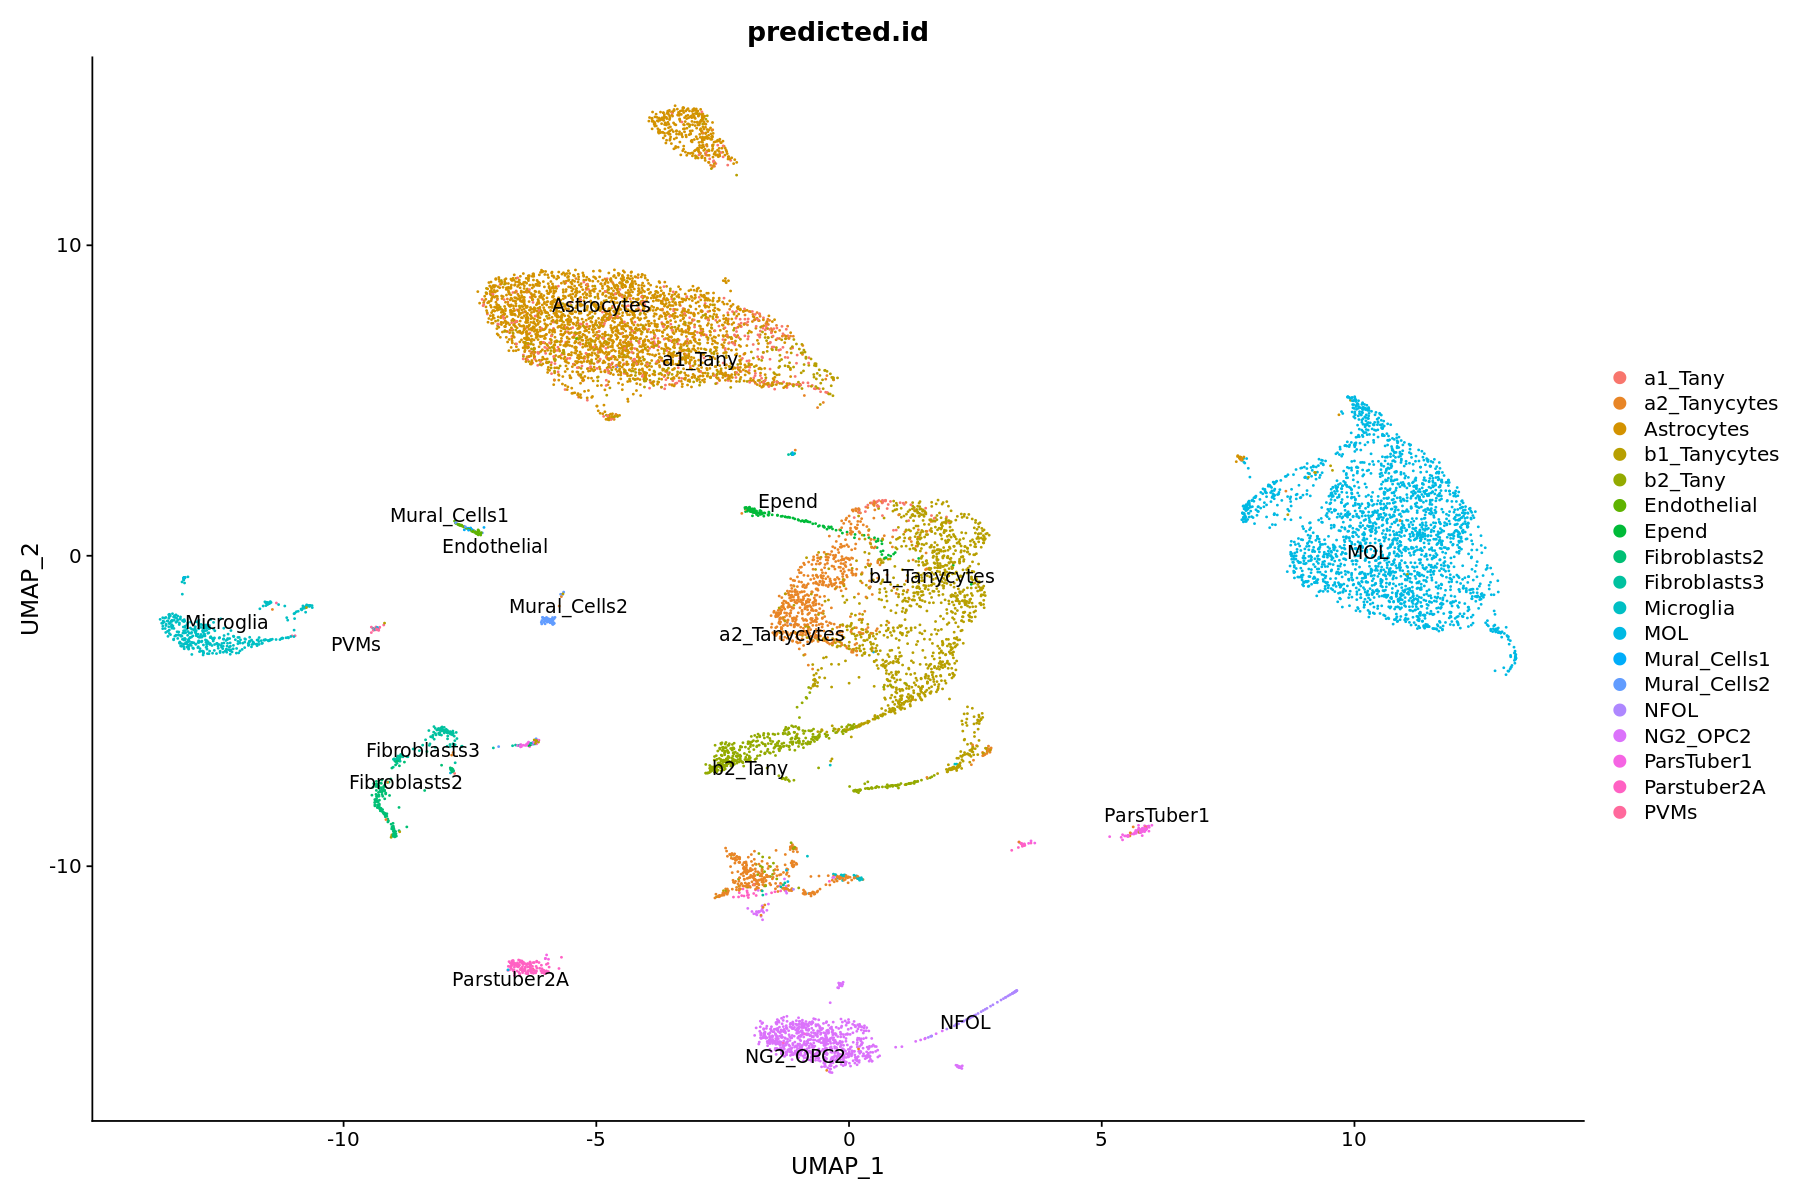

In [144]:
options(repr.plot.width=15, repr.plot.height=10)
DimPlot(obj, reduction = "umap", group.by = "predicted.id", label = TRUE,  repel = TRUE)

In [ ]:
options(repr.plot.width=15, repr.plot.height=10)
DimPlot(obj, reduction = "umap", group.by = "labels", label = TRUE,  repel = TRUE)

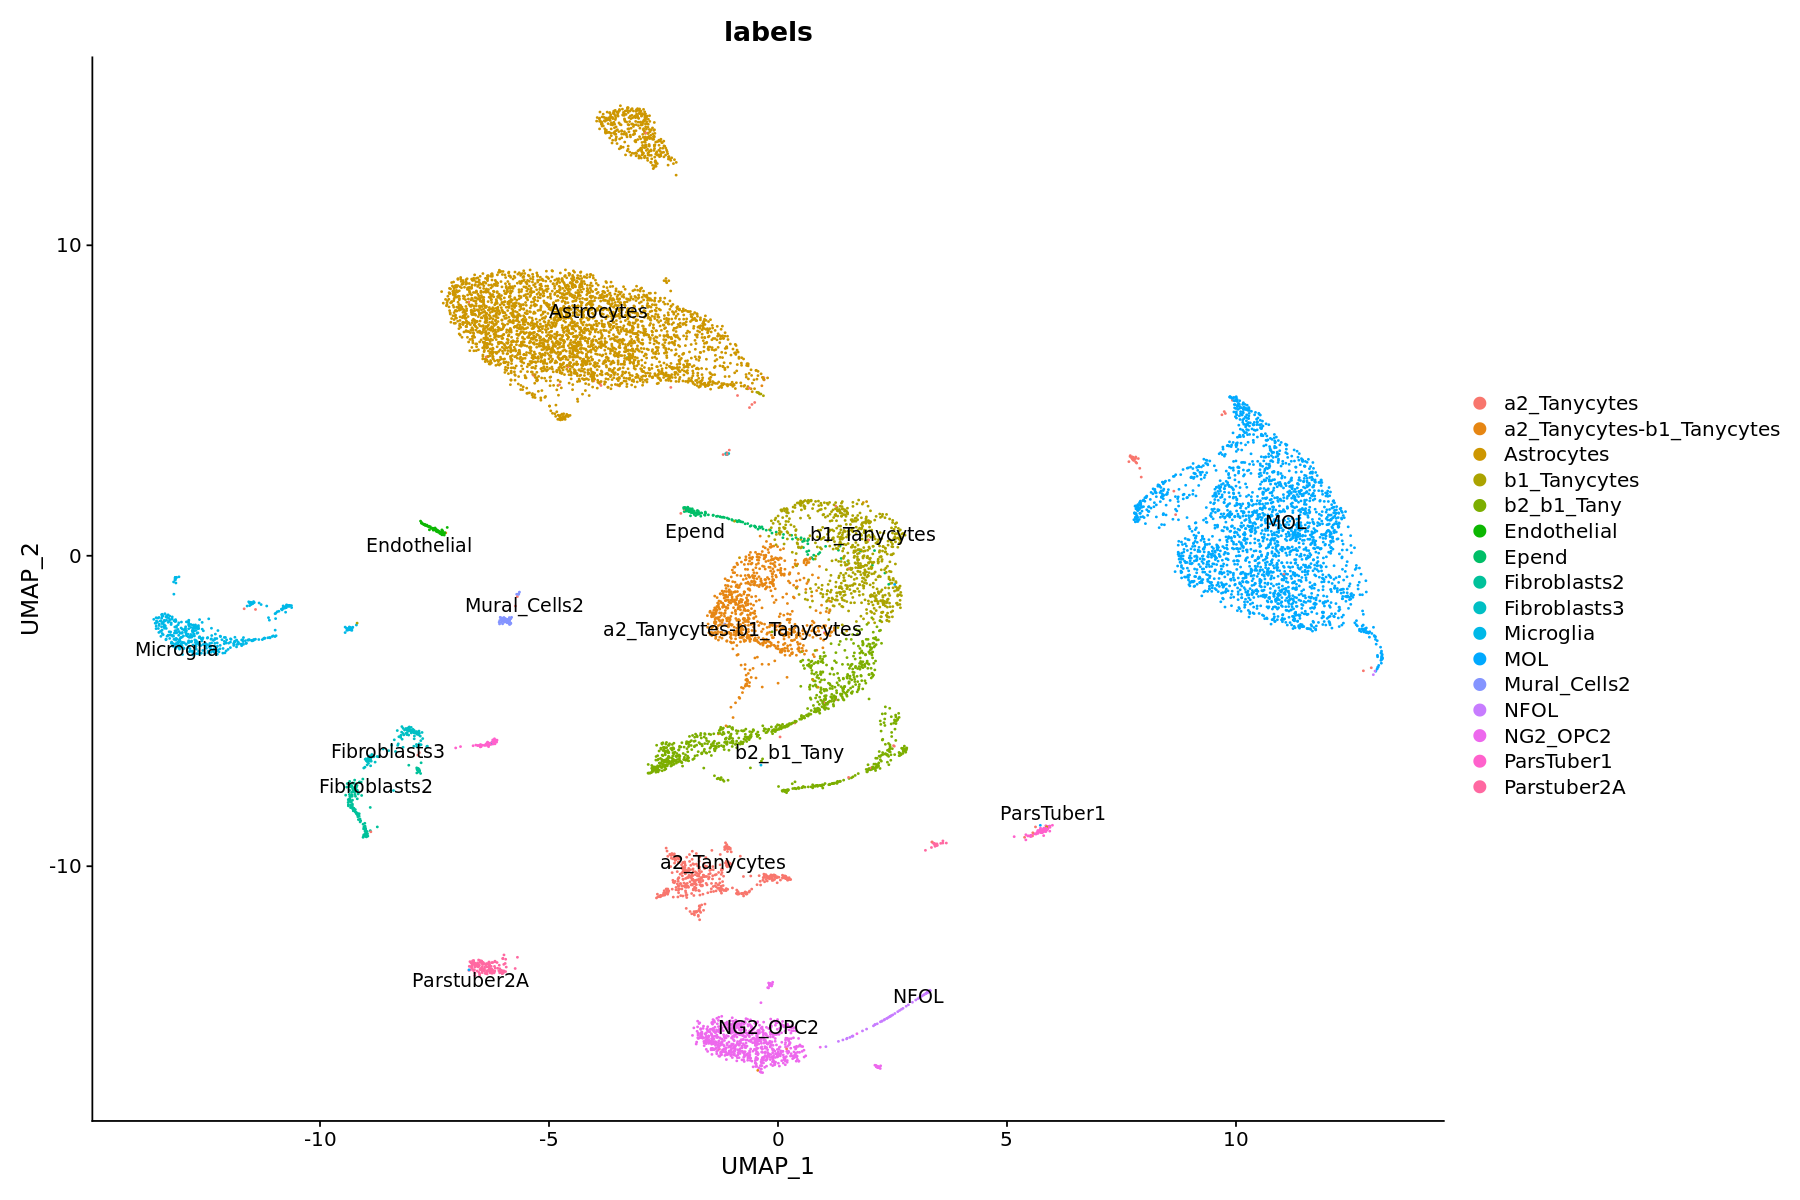

In [145]:
options(repr.plot.width=15, repr.plot.height=10)
DimPlot(obj, reduction = "umap", group.by = "labels", label = TRUE,  repel = TRUE)

In [146]:
exp

function (x)  .Primitive("exp")

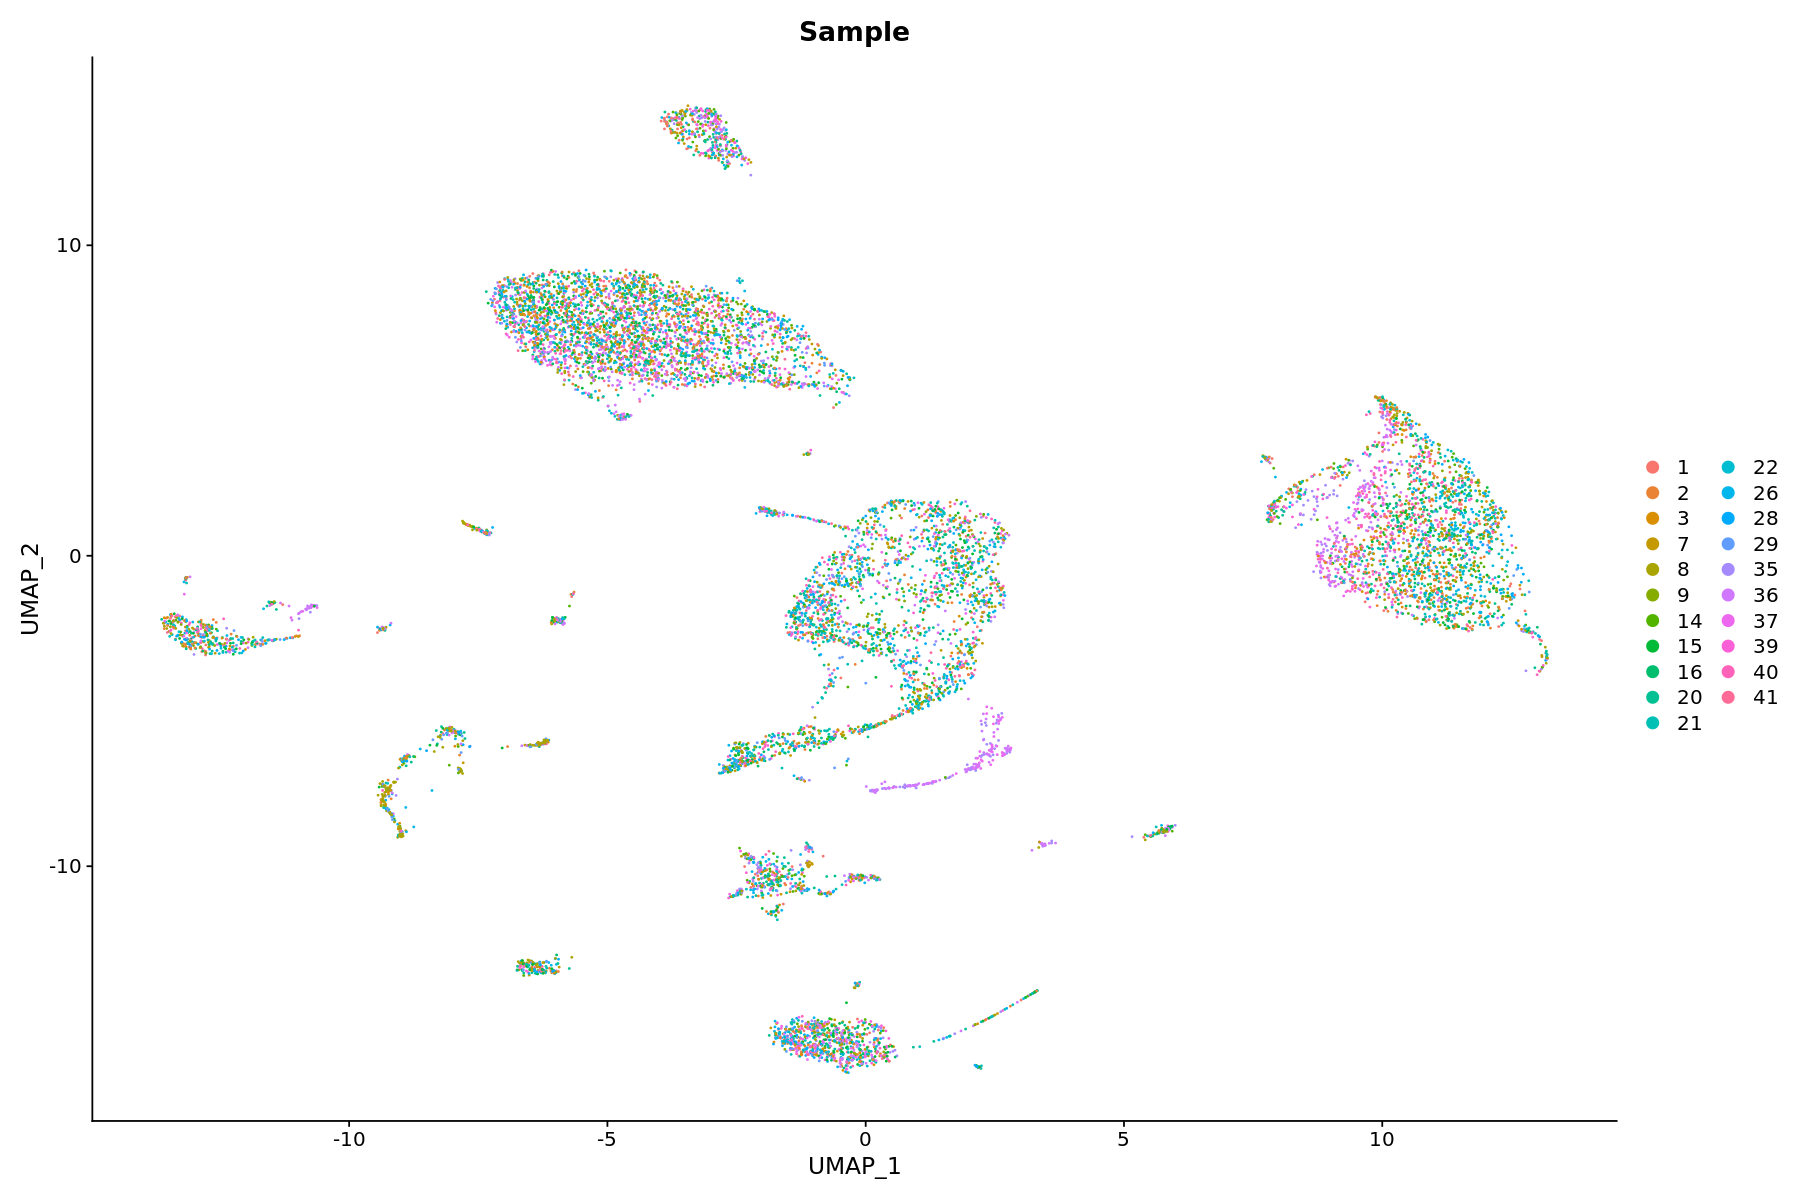

In [147]:
options(repr.plot.width=15, repr.plot.height=10)
DimPlot(obj, reduction = "umap", group.by = "Sample")

In [148]:
obj@meta.data$condition <- stringr::str_split(obj@meta.data$hash.mcl.ID, pattern='-', n=2, simplify=TRUE)[,2]

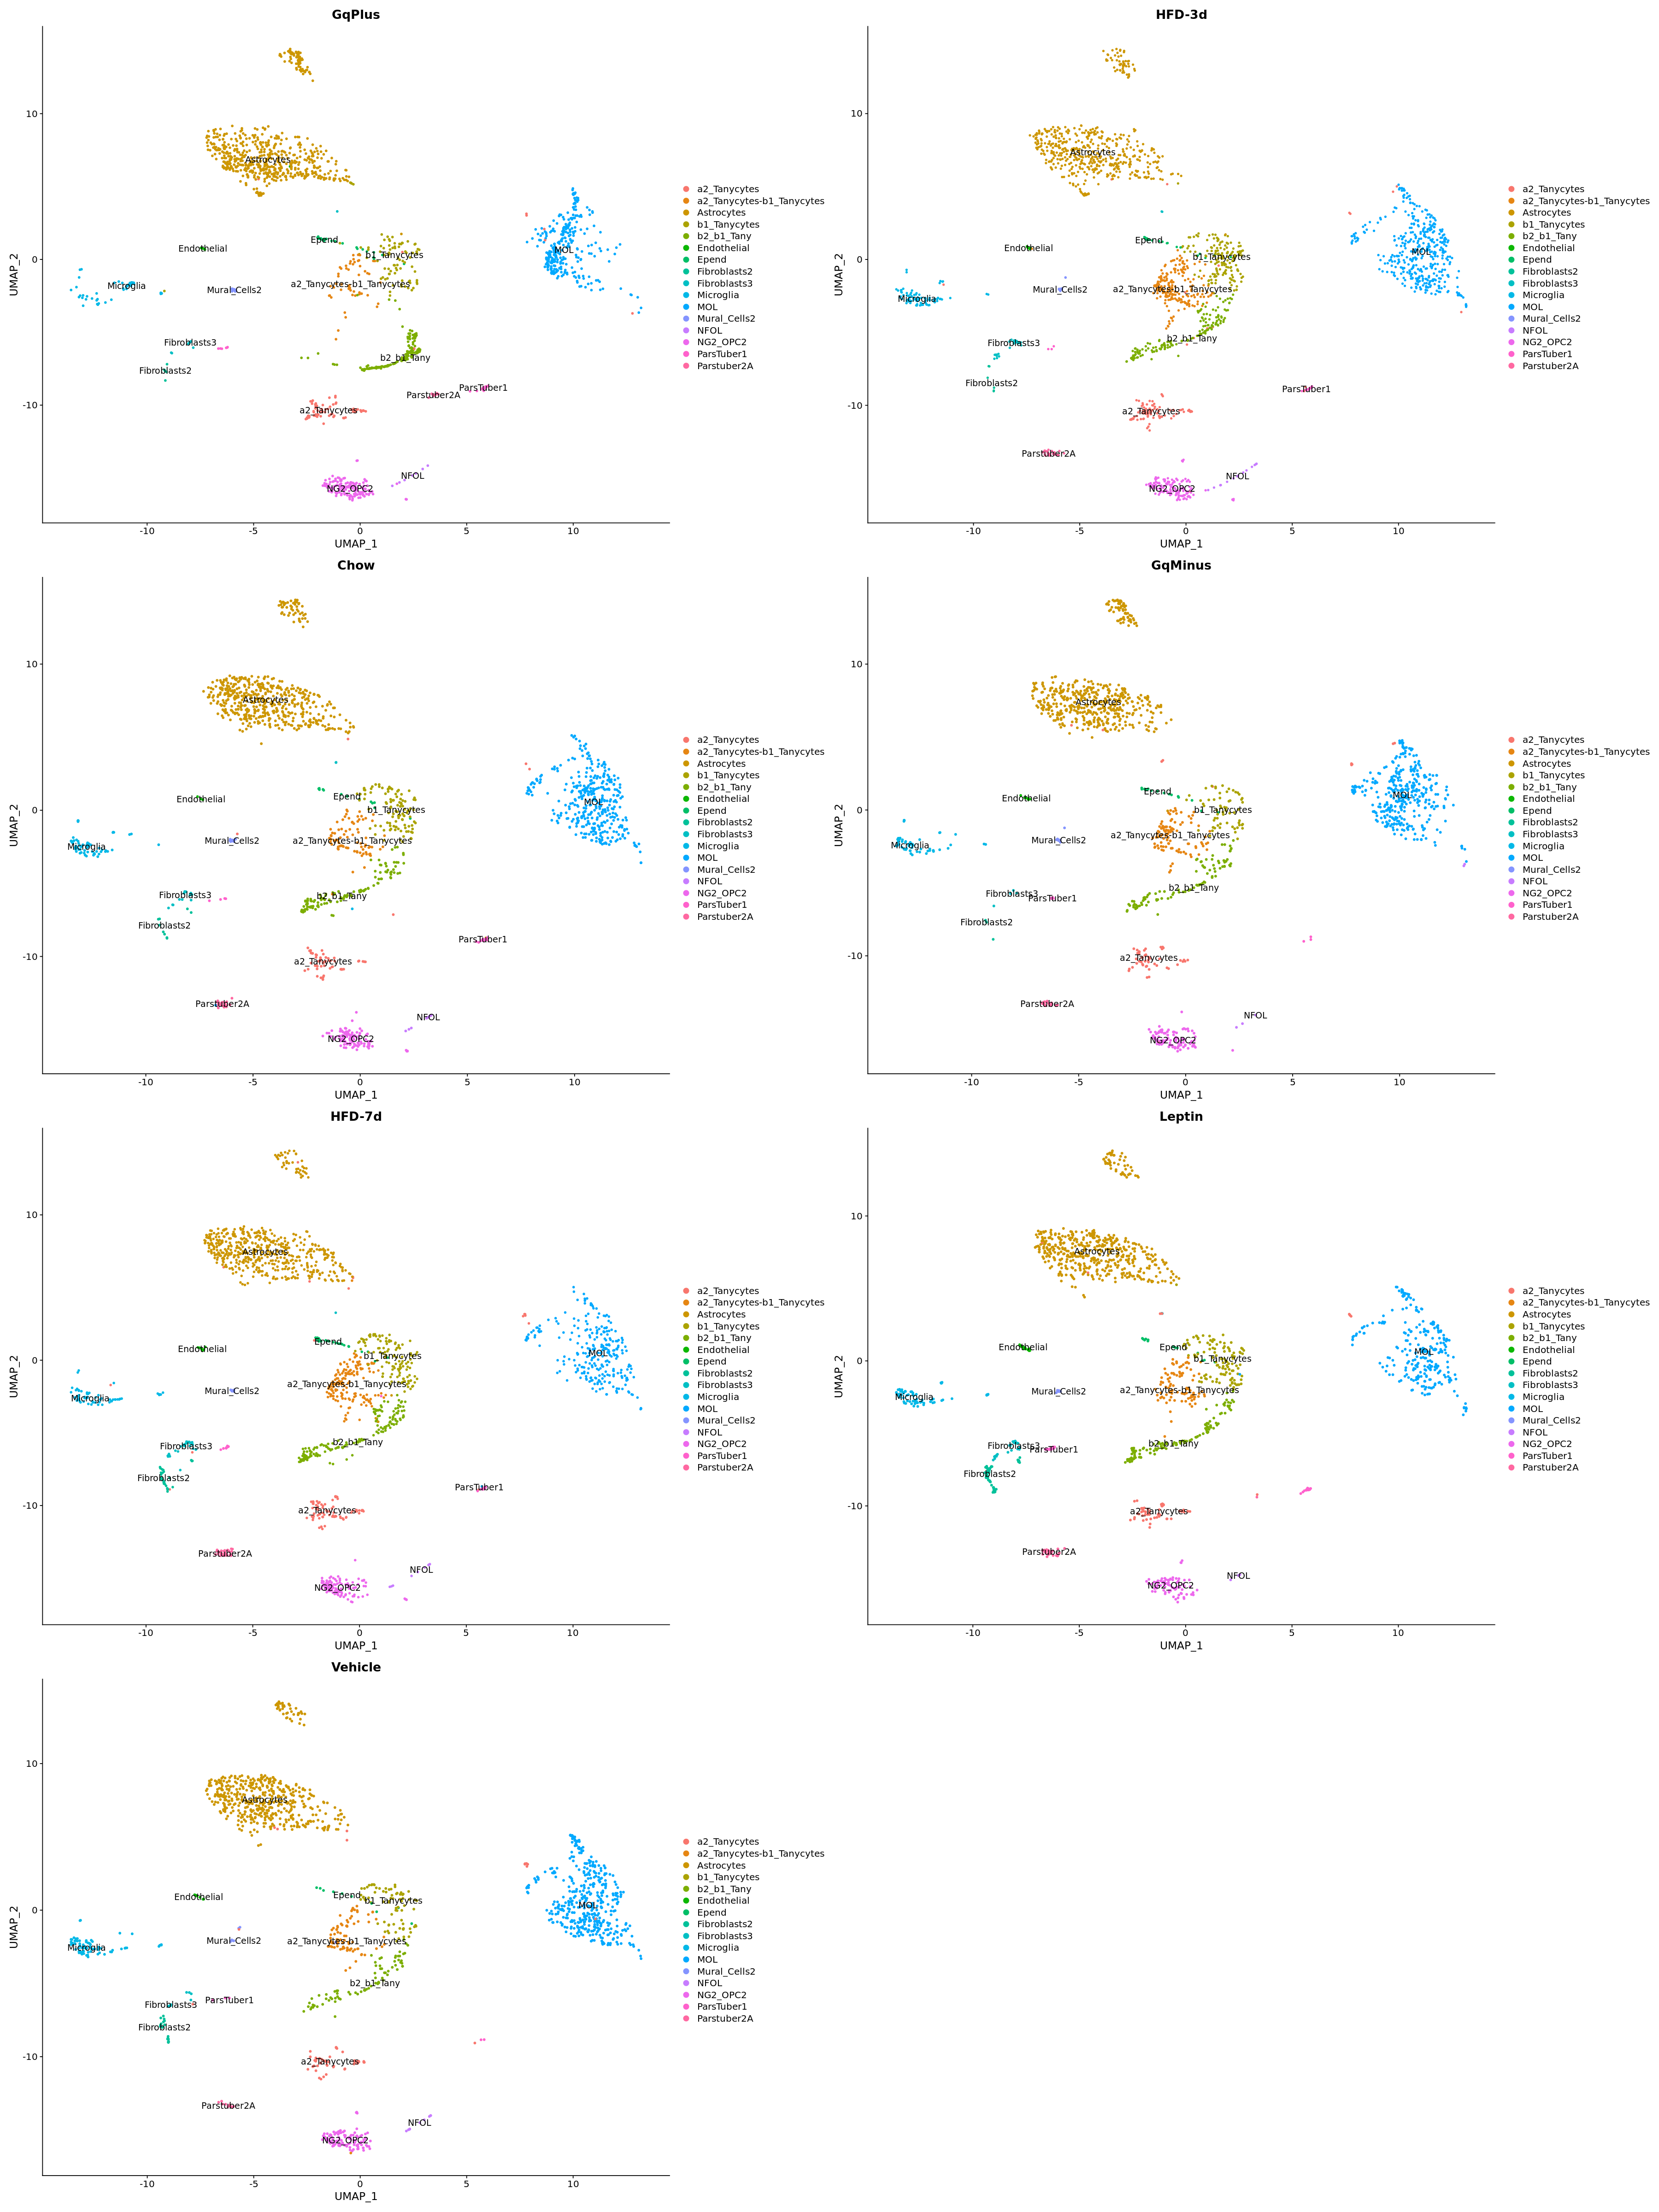

In [149]:
obj_list <- SplitObject(obj, split.by = "condition")
plot.list <- lapply(X = obj_list, FUN = function(x) {
    DimPlot(x, reduction = "umap", group.by = "labels", , label = TRUE) + ggplot2::ggtitle(unique(x$condition))
})
options(repr.plot.width=30, repr.plot.height=40)
patchwork::wrap_plots(plot.list, ncol=2)

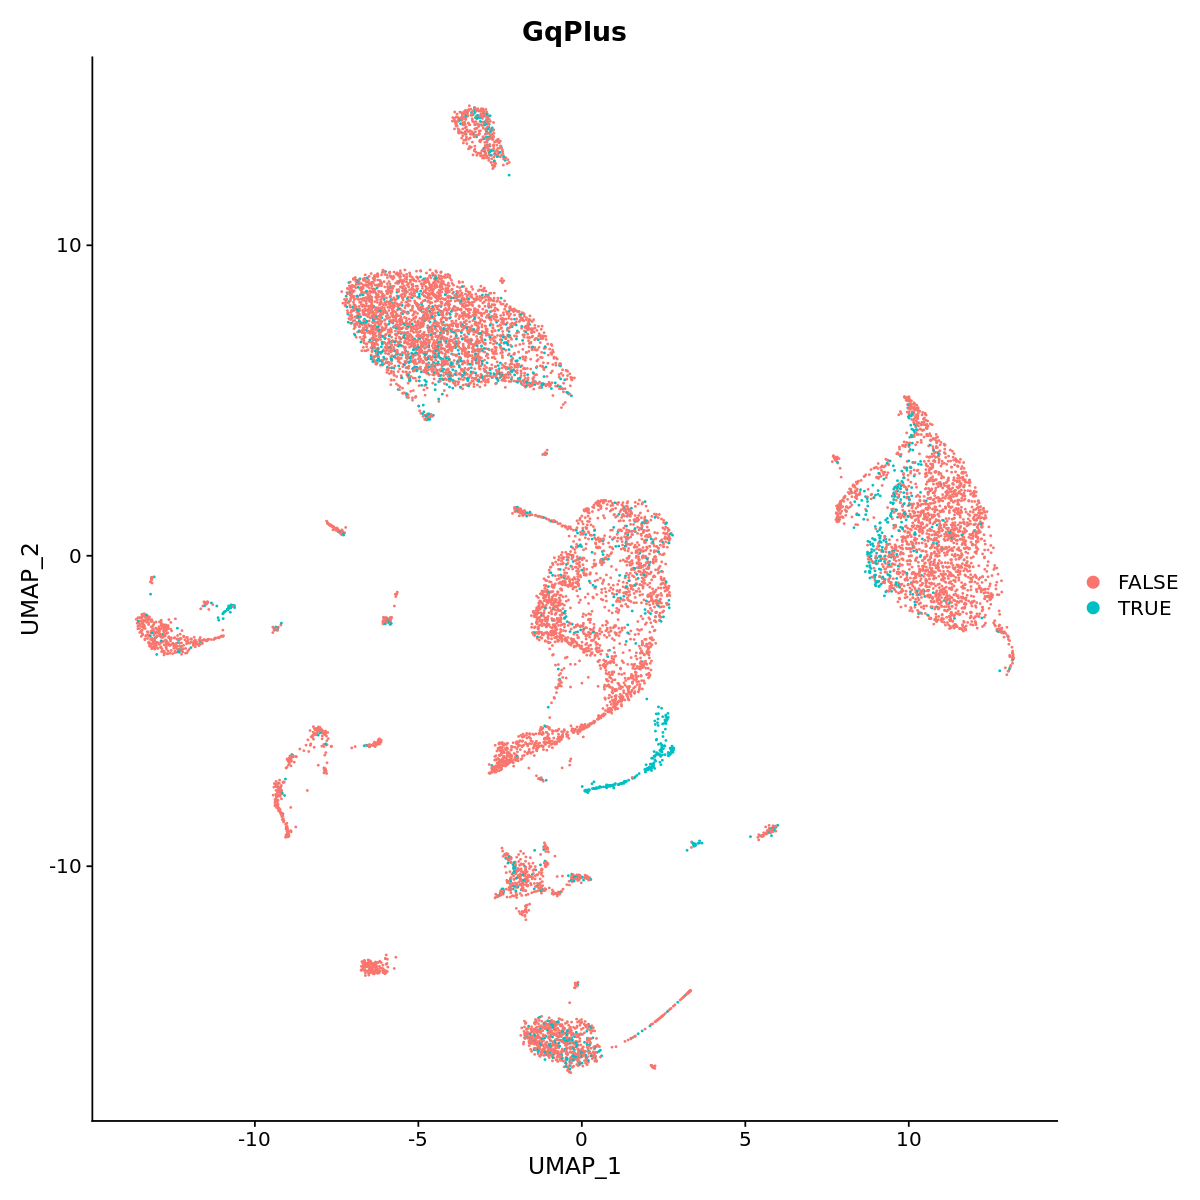

In [150]:
obj@meta.data$GqPlus = obj@meta.data$Group == 'GqPlus'
options(repr.plot.width=10, repr.plot.height=10)
DimPlot(obj, reduction = "umap", group.by = "GqPlus", label = FALSE)



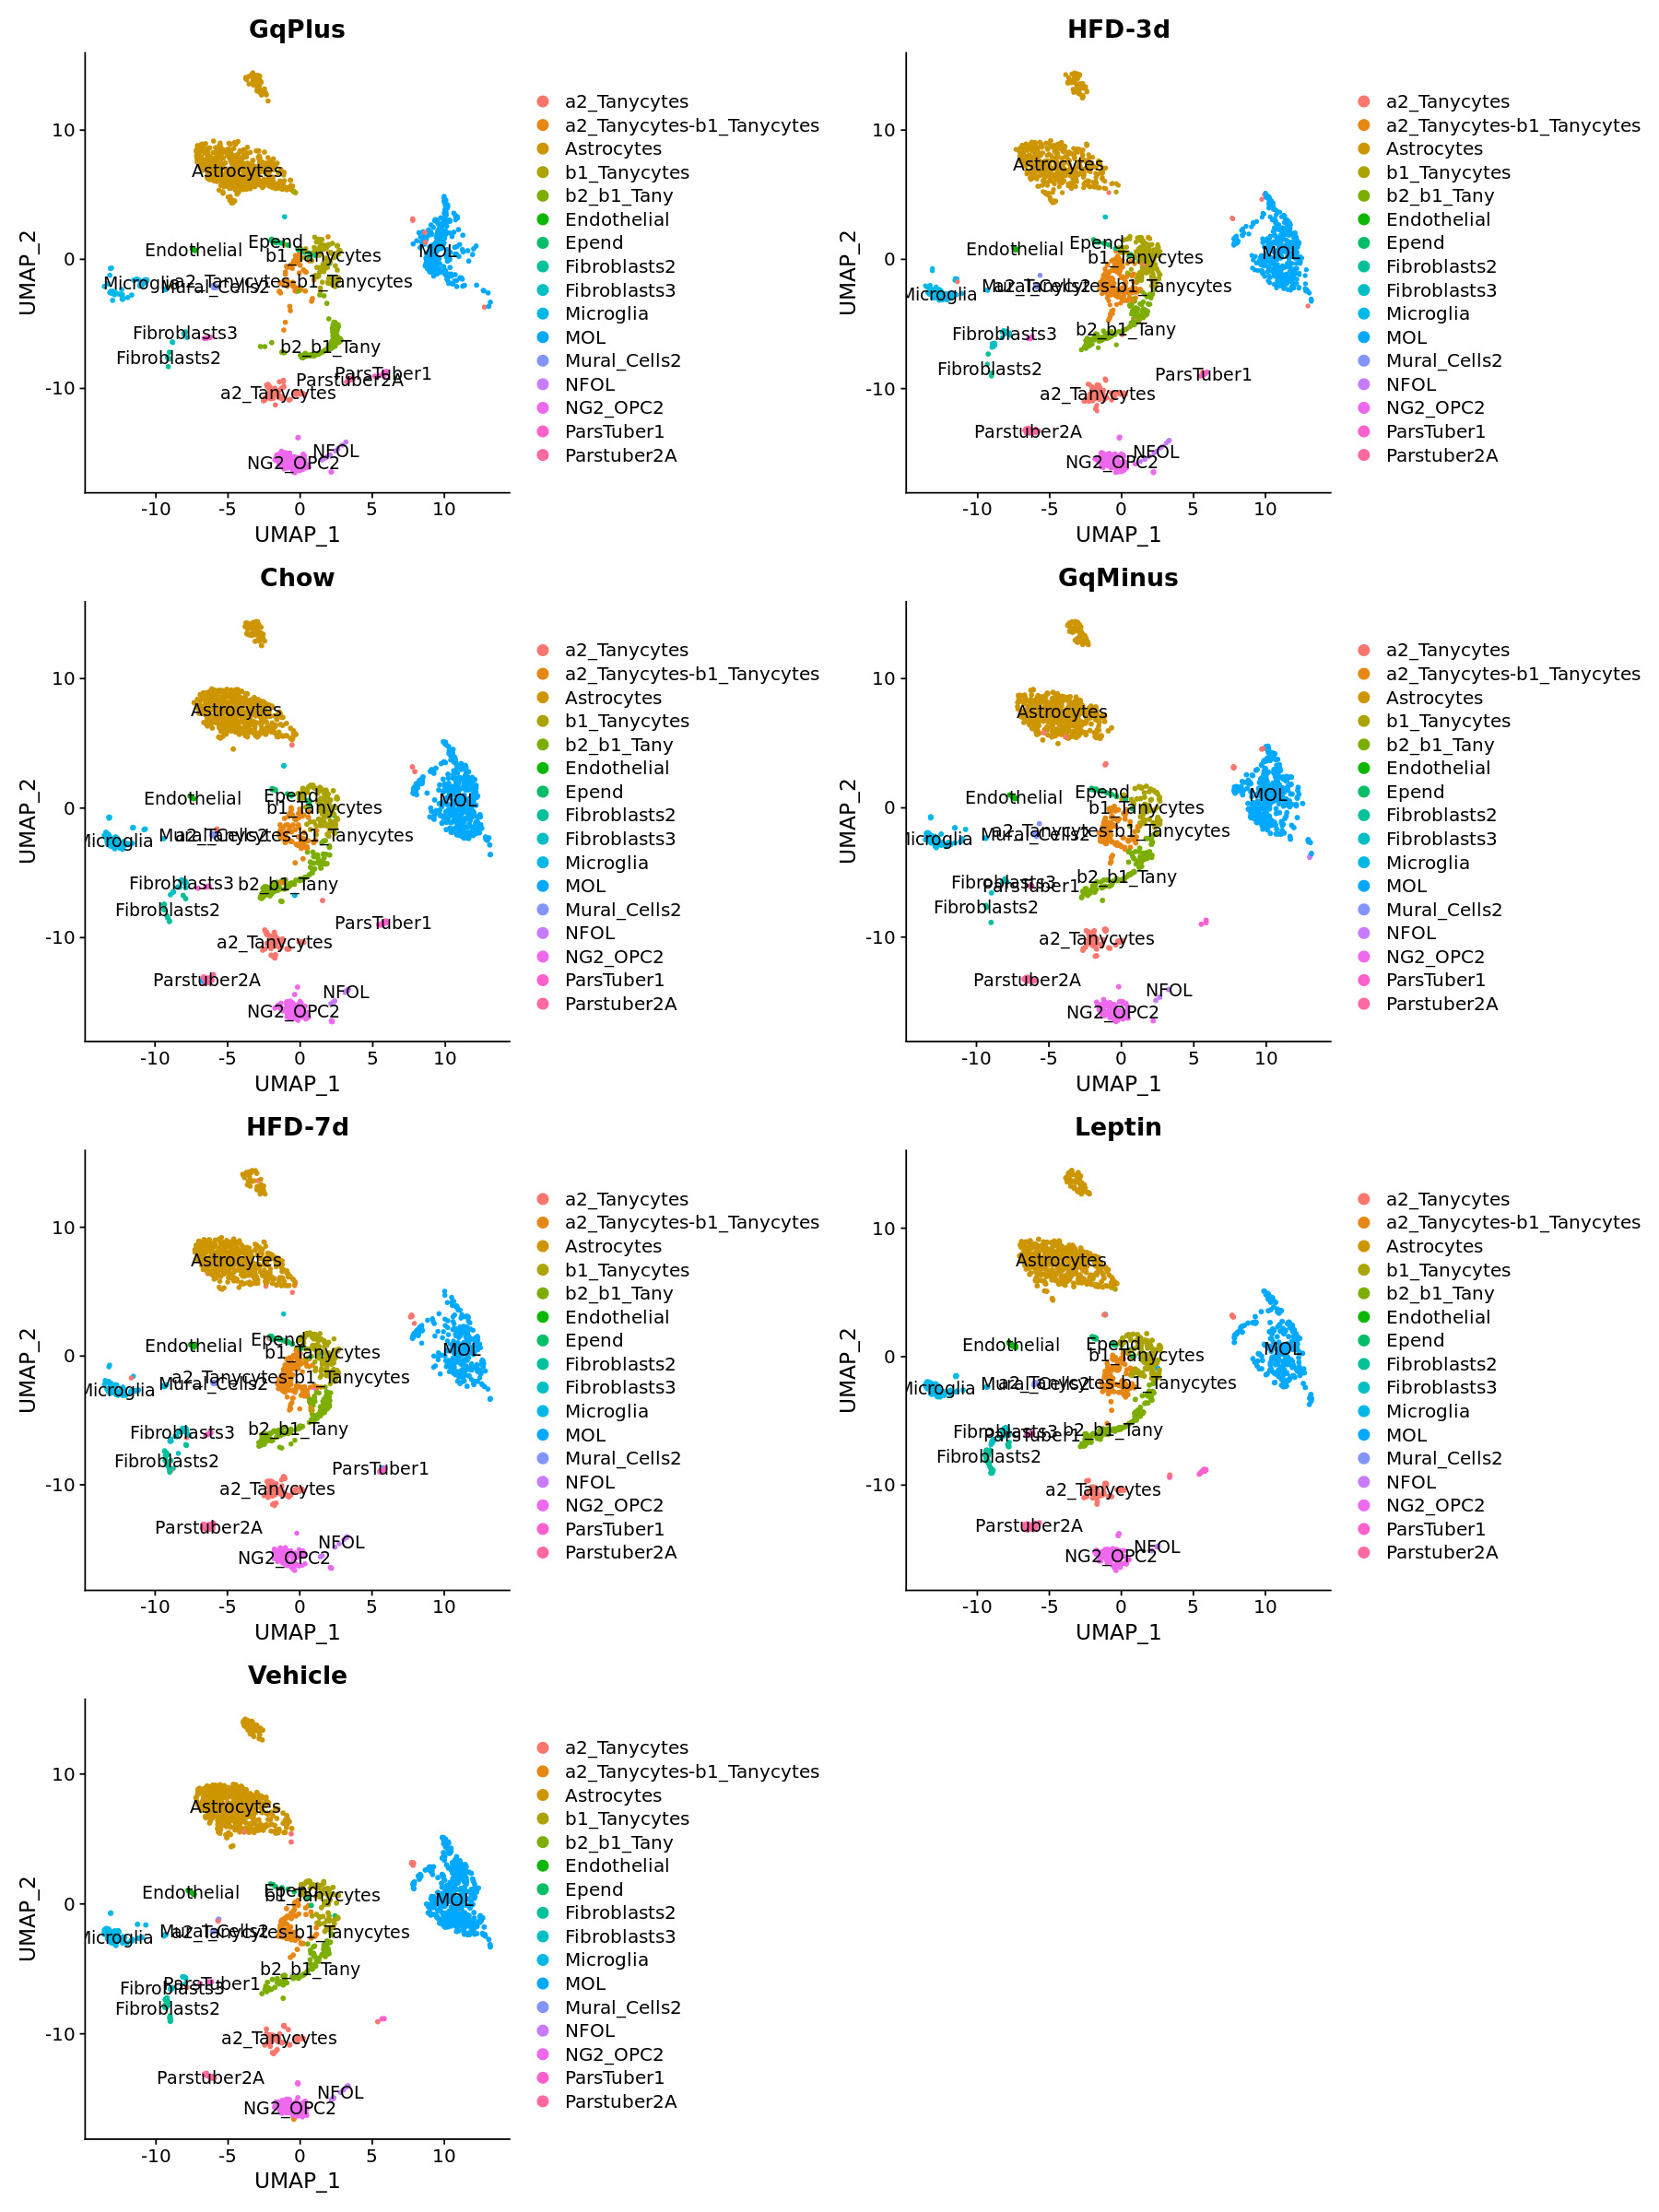

In [151]:
obj_list <- SplitObject(obj, split.by = "condition")
plot.list <- lapply(X = obj_list, FUN = function(x) {
    DimPlot(x, reduction = "umap", group.by = "labels", , label = TRUE) + ggplot2::ggtitle(unique(x$condition))
})
options(repr.plot.width=15, repr.plot.height=20)
patchwork::wrap_plots(plot.list, ncol=2)

In [ ]:
DefaultAssay(obj) <- "SCT"
name = '13_vs_11_9'
markers = FindMarkers(object=obj, ident="seurat_clusters", ident.1=13, ident.2=c(11,9))
top_markers = markers %>% filter(avg_log2FC > 0)
top_markers = rownames(top_markers)[1:24]
# top_markers = rownames(top_markers)[1:12]
# bottom_markers = markers %>% filter(avg_log2FC < 0)
# bottom_markers = rownames(bottom_markers)[1:12]
# display_genes = c(top_markers, bottom_markers)
display_genes = top_markers
DefaultAssay(obj) <- "RNA"
fp = FeaturePlot(obj,
            features = display_genes,
           pt.size=5,
           order=TRUE,
           min.cutoff="q01",
           max.cutoff="q99",
           ncol=4,
           raster=TRUE,
           raster.dpi=c(1024, 1024)
           )
fp = fp & theme_bw(base_size=10) & theme(axis.title.x=element_blank(),
                   axis.text.x=element_blank(),
                   axis.ticks.x=element_blank(),
                   axis.title.y=element_blank(),
                   axis.text.y=element_blank(),
                   axis.ticks.y=element_blank(),
                   legend.key.width=unit(0.2,"cm"),
                   legend.key.height=unit(0.5,"cm"),
                    legend.text=element_text(size=5))
ggsave(paste0(name, '.pdf'), plot=fp, device='pdf', height=297, width=210, units='mm', limitsize=FALSE)
write.csv(markers, paste0(name, '.csv'))

In [ ]:
DefaultAssay(obj) <- "SCT"
name = '11_9_vs_13'
markers = FindMarkers(object=obj, ident="seurat_clusters", ident.1=c(11,9), ident.2=13)
top_markers = markers %>% filter(avg_log2FC > 0)
top_markers = rownames(top_markers)[1:24]
# top_markers = rownames(top_markers)[1:12]
# bottom_markers = markers %>% filter(avg_log2FC < 0)
# bottom_markers = rownames(bottom_markers)[1:12]
# display_genes = c(top_markers, bottom_markers)
display_genes = top_markers
DefaultAssay(obj) <- "RNA"
fp = FeaturePlot(obj,
            features = display_genes,
           pt.size=5,
           order=TRUE,
           min.cutoff="q01",
           max.cutoff="q99",
           ncol=4,
           raster=TRUE,
           raster.dpi=c(1024, 1024)
           )
fp = fp & theme_bw(base_size=10) & theme(axis.title.x=element_blank(),
                   axis.text.x=element_blank(),
                   axis.ticks.x=element_blank(),
                   axis.title.y=element_blank(),
                   axis.text.y=element_blank(),
                   axis.ticks.y=element_blank(),
                   legend.key.width=unit(0.2,"cm"),
                   legend.key.height=unit(0.5,"cm"),
                    legend.text=element_text(size=5))
ggsave(paste0(name, '.pdf'), plot=fp, device='pdf', height=297, width=210, units='mm', limitsize=FALSE)
write.csv(markers, paste0(name, '.csv'))

In [ ]:
DefaultAssay(obj) <- "SCT"
name = '13_vs_11_9_5_3'
markers = FindMarkers(object=obj, ident="seurat_clusters", ident.1=13, ident.2=c(11, 9, 5, 3))
top_markers = markers %>% filter(avg_log2FC > 0)
top_markers = rownames(top_markers)[1:24]
# top_markers = rownames(top_markers)[1:12]
# bottom_markers = markers %>% filter(avg_log2FC < 0)
# bottom_markers = rownames(bottom_markers)[1:12]
# display_genes = c(top_markers, bottom_markers)
display_genes = top_markers
DefaultAssay(obj) <- "RNA"
fp = FeaturePlot(obj,
            features = display_genes,
           pt.size=5,
           order=TRUE,
           min.cutoff="q01",
           max.cutoff="q99",
           ncol=4,
           raster=TRUE,
           raster.dpi=c(1024, 1024)
           )
fp = fp & theme_bw(base_size=10) & theme(axis.title.x=element_blank(),
                   axis.text.x=element_blank(),
                   axis.ticks.x=element_blank(),
                   axis.title.y=element_blank(),
                   axis.text.y=element_blank(),
                   axis.ticks.y=element_blank(),
                   legend.key.width=unit(0.2,"cm"),
                   legend.key.height=unit(0.5,"cm"),
                    legend.text=element_text(size=5))
ggsave(paste0(name, '.pdf'), plot=fp, device='pdf', height=297, width=210, units='mm', limitsize=FALSE)
write.csv(markers, paste0(name, '.csv'))

In [ ]:
DefaultAssay(obj) <- "SCT"
name = '11_9_5_3_vs_13'
markers = FindMarkers(object=obj, ident="seurat_clusters", ident.1=c(11, 9, 5, 3), ident.2=13)
top_markers = markers %>% filter(avg_log2FC > 0)
top_markers = rownames(top_markers)[1:24]
# top_markers = rownames(top_markers)[1:12]
# bottom_markers = markers %>% filter(avg_log2FC < 0)
# bottom_markers = rownames(bottom_markers)[1:12]
# display_genes = c(top_markers, bottom_markers)
display_genes = top_markers
DefaultAssay(obj) <- "RNA"
fp = FeaturePlot(obj,
            features = display_genes,
           pt.size=5,
           order=TRUE,
           min.cutoff="q01",
           max.cutoff="q99",
           ncol=4,
           raster=TRUE,
           raster.dpi=c(1024, 1024)
           )
fp = fp & theme_bw(base_size=10) & theme(axis.title.x=element_blank(),
                   axis.text.x=element_blank(),
                   axis.ticks.x=element_blank(),
                   axis.title.y=element_blank(),
                   axis.text.y=element_blank(),
                   axis.ticks.y=element_blank(),
                   legend.key.width=unit(0.2,"cm"),
                   legend.key.height=unit(0.5,"cm"),
                    legend.text=element_text(size=5))
ggsave(paste0(name, '.pdf'), plot=fp, device='pdf', height=297, width=210, units='mm', limitsize=FALSE)
write.csv(markers, paste0(name, '.csv'))

In [ ]:
DefaultAssay(obj) <- "SCT"
cluster_id = 13
other_clusters = setdiff(obj@meta.data$seurat_clusters, c(c(11, 9, 5, 3, 13)))
name = paste0(cluster_id, '_vs_nontanyctes')
markers = FindMarkers(object=obj, ident="seurat_clusters", ident.1=13, ident.2=other_clusters)
top_markers = markers %>% filter(avg_log2FC > 0)
top_markers = rownames(top_markers)[1:24]
# top_markers = rownames(top_markers)[1:12]
# bottom_markers = markers %>% filter(avg_log2FC < 0)
# bottom_markers = rownames(bottom_markers)[1:12]
# display_genes = c(top_markers, bottom_markers)
display_genes = top_markers
DefaultAssay(obj) <- "RNA"
fp = FeaturePlot(obj,
            features = display_genes,
           pt.size=5,
           order=TRUE,
           min.cutoff="q01",
           max.cutoff="q99",
           ncol=4,
           raster=TRUE,
           raster.dpi=c(1024, 1024)
           )
fp = fp & theme_bw(base_size=10) & theme(axis.title.x=element_blank(),
                   axis.text.x=element_blank(),
                   axis.ticks.x=element_blank(),
                   axis.title.y=element_blank(),
                   axis.text.y=element_blank(),
                   axis.ticks.y=element_blank(),
                   legend.key.width=unit(0.2,"cm"),
                   legend.key.height=unit(0.5,"cm"),
                    legend.text=element_text(size=5))
ggsave(paste0(name, '.pdf'), plot=fp, device='pdf', height=297, width=210, units='mm', limitsize=FALSE)
write.csv(markers, paste0(name, '.csv'))

In [ ]:
DefaultAssay(obj) <- "SCT"
cluster_id = 11
other_clusters = setdiff(obj@meta.data$seurat_clusters, c(c(11, 9, 5, 3, 13)))
name = paste0(cluster_id, '_vs_nontanyctes')
markers = FindMarkers(object=obj, ident="seurat_clusters", ident.1=cluster_id, ident.2=other_clusters)
top_markers = markers %>% filter(avg_log2FC > 0)
top_markers = rownames(top_markers)[1:24]
# top_markers = rownames(top_markers)[1:12]
# bottom_markers = markers %>% filter(avg_log2FC < 0)
# bottom_markers = rownames(bottom_markers)[1:12]
# display_genes = c(top_markers, bottom_markers)
display_genes = top_markers
DefaultAssay(obj) <- "RNA"
fp = FeaturePlot(obj,
            features = display_genes,
           pt.size=5,
           order=TRUE,
           min.cutoff="q01",
           max.cutoff="q99",
           ncol=4,
           raster=TRUE,
           raster.dpi=c(1024, 1024)
           )
fp = fp & theme_bw(base_size=10) & theme(axis.title.x=element_blank(),
                   axis.text.x=element_blank(),
                   axis.ticks.x=element_blank(),
                   axis.title.y=element_blank(),
                   axis.text.y=element_blank(),
                   axis.ticks.y=element_blank(),
                   legend.key.width=unit(0.2,"cm"),
                   legend.key.height=unit(0.5,"cm"),
                    legend.text=element_text(size=5))
ggsave(paste0(name, '.pdf'), plot=fp, device='pdf', height=297, width=210, units='mm', limitsize=FALSE)
write.csv(markers, paste0(name, '.csv'))

In [ ]:
paste0(c(1,2))

In [ ]:
markers = c('Adm', 'Rax', 'Crym',
            'Ppp1r1b', 'Vim', 'Rax', 'Dio2', 'Slc16a2',
            'Cldn1', 'Vegf', 'Cdh2', 'Cav1', "Slc2a1",
            'Sox2', 'Fgf10', 'Blbp', 'Musashi1', 'Fgfr1',
            'Cntfr', 'Slc1a3', 'Slc16a1', 'Slc16a4', 'Gja1',
            'Fgf18', 'Prss56', 'Col23a1', 'Cd59a', 'Slc17a8', 'Vcan')


In [ ]:
head(rownames(obj))

In [ ]:
length(intersect(markers, rownames(obj)))

In [ ]:
DefaultAssay(obj) <- "SCT"
name = 'tanycyte_markers_langlet'
markers = c('Adm', 'Rax', 'Crym',
            'Ppp1r1b', 'Vim', 'Rax', 'Dio2', 'Slc16a2',
            'Cldn1', 'Vegf', 'Cdh2', 'Cav1', "Slc2a1",
            'Sox2', 'Fgf10', 'Blbp', 'Musashi1', 'Fgfr1',
            'Cntfr', 'Slc1a3', 'Slc16a1', 'Slc16a4', 'Gja1',
            'Fgf18', 'Prss56', 'Col23a1', 'Cd59a', 'Slc17a8', 'Vcan',
            'Frzb', 'Penk', 'Vegfa', 'Vegfb', 'Vegfc', 'Sprr1a', 'Ocln', 'Ptn')
markers = unique(markers)
# top_markers = rownames(top_markers)[1:12]
# bottom_markers = markers %>% filter(avg_log2FC < 0)
# bottom_markers = rownames(bottom_markers)[1:12]
# display_genes = c(top_markers, bottom_markers)
display_genes = markers
# DefaultAssay(obj) <- "RNA"
fp = FeaturePlot(obj,
            features = display_genes,
           pt.size=5,
           order=TRUE,
           min.cutoff="q01",
           max.cutoff="q99",
           ncol=4,
           raster=TRUE,
           raster.dpi=c(1024, 1024)
           )
fp = fp & theme_bw(base_size=10) & theme(axis.title.x=element_blank(),
                   axis.text.x=element_blank(),
                   axis.ticks.x=element_blank(),
                   axis.title.y=element_blank(),
                   axis.text.y=element_blank(),
                   axis.ticks.y=element_blank(),
                   legend.key.width=unit(0.2,"cm"),
                   legend.key.height=unit(0.5,"cm"),
                    legend.text=element_text(size=5))
ggsave(paste0(name, '.pdf'), plot=fp, device='pdf', height=297, width=210, units='mm', limitsize=FALSE)

In [ ]:
DefaultAssay(obj) <- "SCT"
name = 'tanycyte_markers_campbell'
markers = c("Cd59a", "Crym", "Vcan", "Frzb", "Penk", "Col25a1", "Adm", 'Sprr1a',
"Stoml3",
"Ctgf",
"Rgs7bp",
"Adm",
"Rgcc",
"Igfbp5",
"Col25a1",
"Mest",
"Fndc3c1",
"Scn7a",
"Fgf10",
"Six6",
"Penk",
"Frzb",
"Rlbp1",
"Gria2",
"Nell2",
"P3h2",
"Ephb1",
"Nr2e1",
"Vcan",
"Slc7a11",
"Gfap",
"Agt",
"Tgfb2",
"Slc1a2",
"Pltp",
"Tm4sf1",
"Pcp4l1",
"Tmem212",
"Ccdc153", 'Adm', 'Rax', 'Crym')
markers = unique(markers)
# top_markers = rownames(top_markers)[1:12]
# bottom_markers = markers %>% filter(avg_log2FC < 0)
# bottom_markers = rownames(bottom_markers)[1:12]
# display_genes = c(top_markers, bottom_markers)
display_genes = markers
# DefaultAssay(obj) <- "RNA"
fp = FeaturePlot(obj,
            features = display_genes,
           pt.size=5,
           order=TRUE,
           min.cutoff="q01",
           max.cutoff="q99",
           ncol=4,
           raster=TRUE,
           raster.dpi=c(1024, 1024)
           )
fp = fp & theme_bw(base_size=10) & theme(axis.title.x=element_blank(),
                   axis.text.x=element_blank(),
                   axis.ticks.x=element_blank(),
                   axis.title.y=element_blank(),
                   axis.text.y=element_blank(),
                   axis.ticks.y=element_blank(),
                   legend.key.width=unit(0.2,"cm"),
                   legend.key.height=unit(0.5,"cm"),
                    legend.text=element_text(size=5))
ggsave(paste0(name, '.pdf'), plot=fp, device='pdf', height=297, width=210, units='mm', limitsize=FALSE)

In [ ]:
sessionInfo()